In [1]:
%%capture
%run cowling_approximation/fModes.py

import h5py
from tqdm.notebook import tqdm_notebook as tqdm
from os import listdir
import time

In [2]:
def listdir_nohidden(path):
    for f in listdir(path):
        if not f.startswith('.'):
            yield f

In [3]:
saved_path = "/Users/utkarsh/PycharmProjects/fmodes/posterior_fmodes/"
curr_list = list(listdir_nohidden(saved_path))

In [4]:
data = h5py.File('/Users/utkarsh/Downloads/LCEHL_EOS_posterior_samples_PSR+GW+NICER.h5', 'r') # EOS posterior conditioned on PSR observations
eos = data["eos"]
names = list(data["eos"].keys())

[STATUS] eos_0 already optimized... Skipping
[STATUS] eos_1 already optimized... Skipping
[STATUS] eos_10 already optimized... Skipping
[ERROR] Integration Failure: eos_100... Skipping
[STATUS] eos_1000 already optimized... Skipping
[STATUS] eos_1001 already optimized... Skipping
[STATUS] eos_1002 already optimized... Skipping
[STATUS] eos_1003 already optimized... Skipping
[STATUS] eos_1004 already optimized... Skipping
[STATUS] eos_1005 already optimized... Skipping
[STATUS] eos_1006 already optimized... Skipping
[STATUS] eos_1007 already optimized... Skipping
[STATUS] eos_1008 already optimized... Skipping
[STATUS] eos_1009 already optimized... Skipping
[STATUS] eos_101 already optimized... Skipping
[STATUS] eos_1010 already optimized... Skipping
[STATUS] eos_1011 already optimized... Skipping
[STATUS] eos_1012 already optimized... Skipping
[STATUS] eos_1013 already optimized... Skipping
[STATUS] eos_1014 already optimized... Skipping
[STATUS] eos_1015 already optimized... Skipping


[STATUS] eos_1153 already optimized... Skipping
[STATUS] eos_1154 already optimized... Skipping
[STATUS] eos_1155 already optimized... Skipping
[STATUS] eos_1156 already optimized... Skipping
[STATUS] eos_1157 already optimized... Skipping
[STATUS] eos_1158 already optimized... Skipping
[STATUS] eos_1159 already optimized... Skipping
[STATUS] eos_116 already optimized... Skipping
[STATUS] eos_1160 already optimized... Skipping
[STATUS] eos_1161 already optimized... Skipping
[STATUS] eos_1162 already optimized... Skipping
[STATUS] eos_1163 already optimized... Skipping
[STATUS] eos_1164 already optimized... Skipping
[STATUS] eos_1165 already optimized... Skipping
[STATUS] eos_1166 already optimized... Skipping
[STATUS] eos_1167 already optimized... Skipping
[STATUS] eos_1168 already optimized... Skipping
[STATUS] eos_1169 already optimized... Skipping
[STATUS] eos_117 already optimized... Skipping
[STATUS] eos_1170 already optimized... Skipping
[STATUS] eos_1171 already optimized... Ski

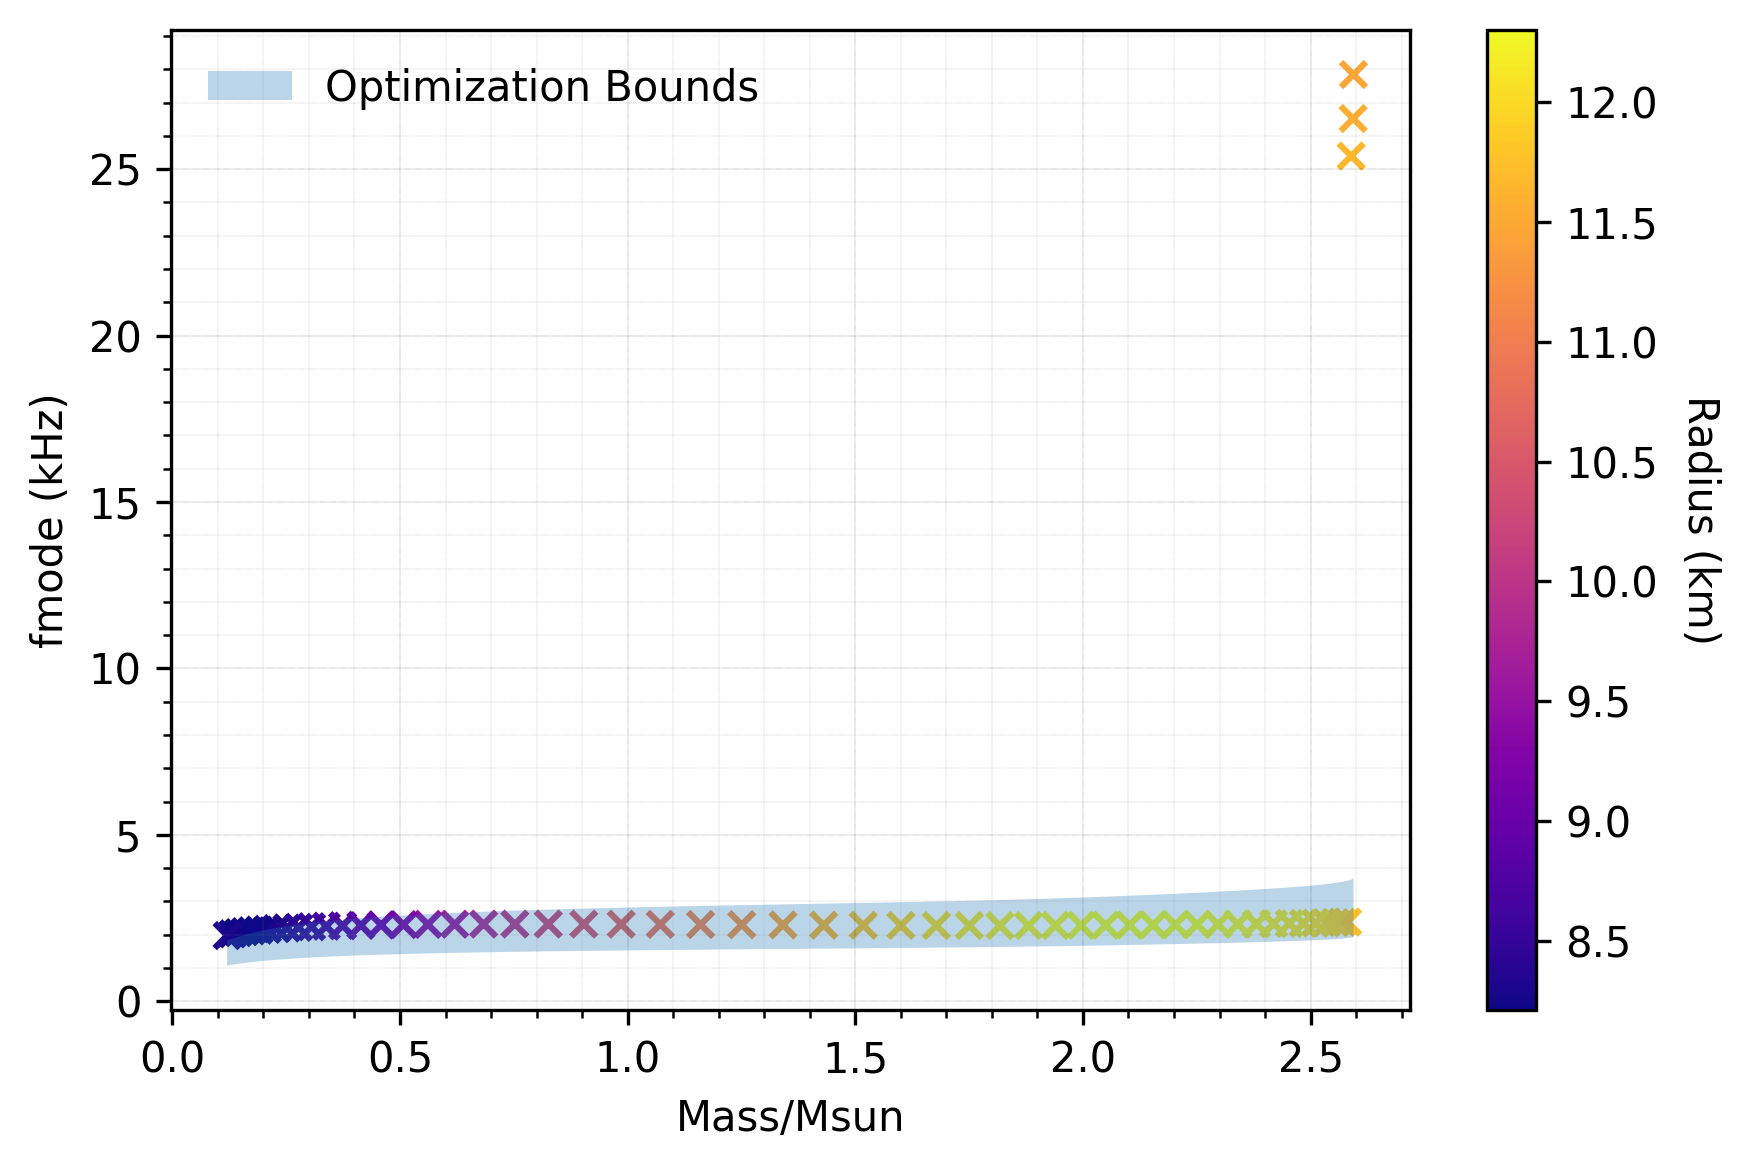

[STATUS] Completed eos_1244...


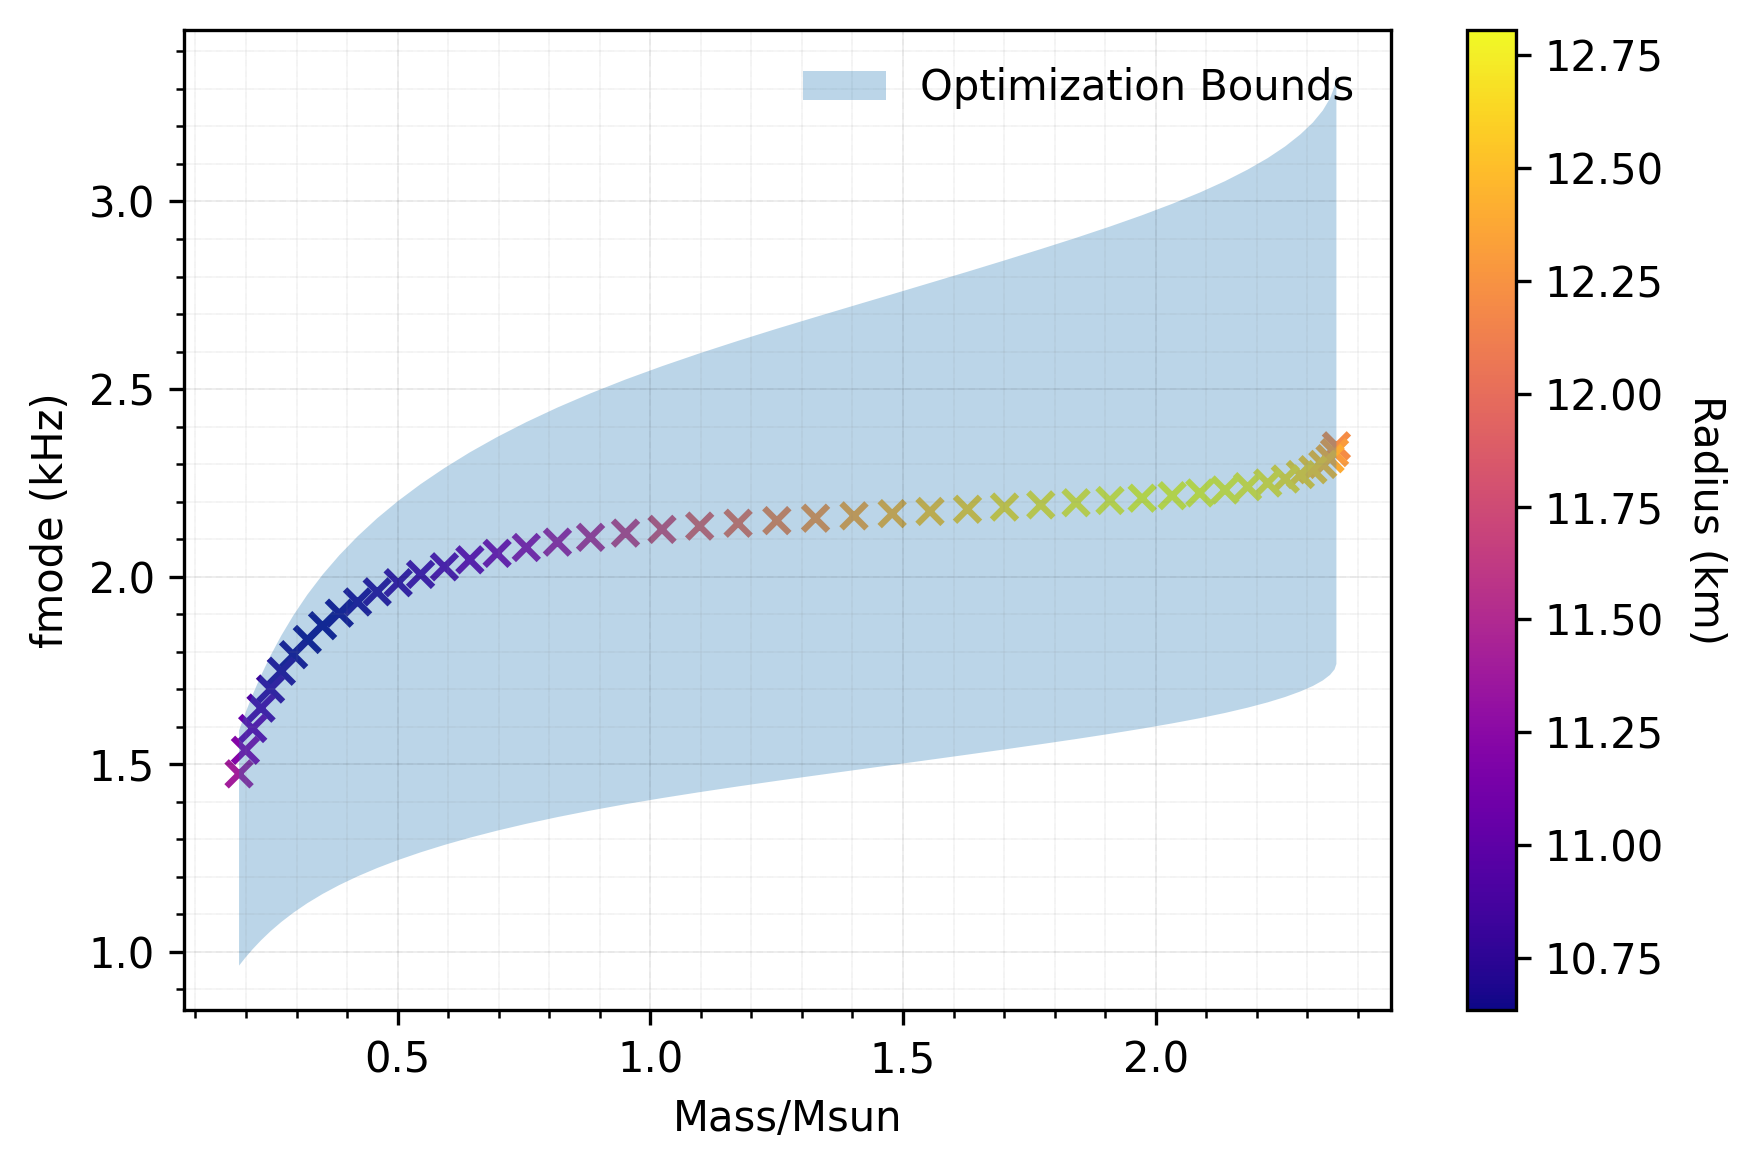

[STATUS] Completed eos_1245...


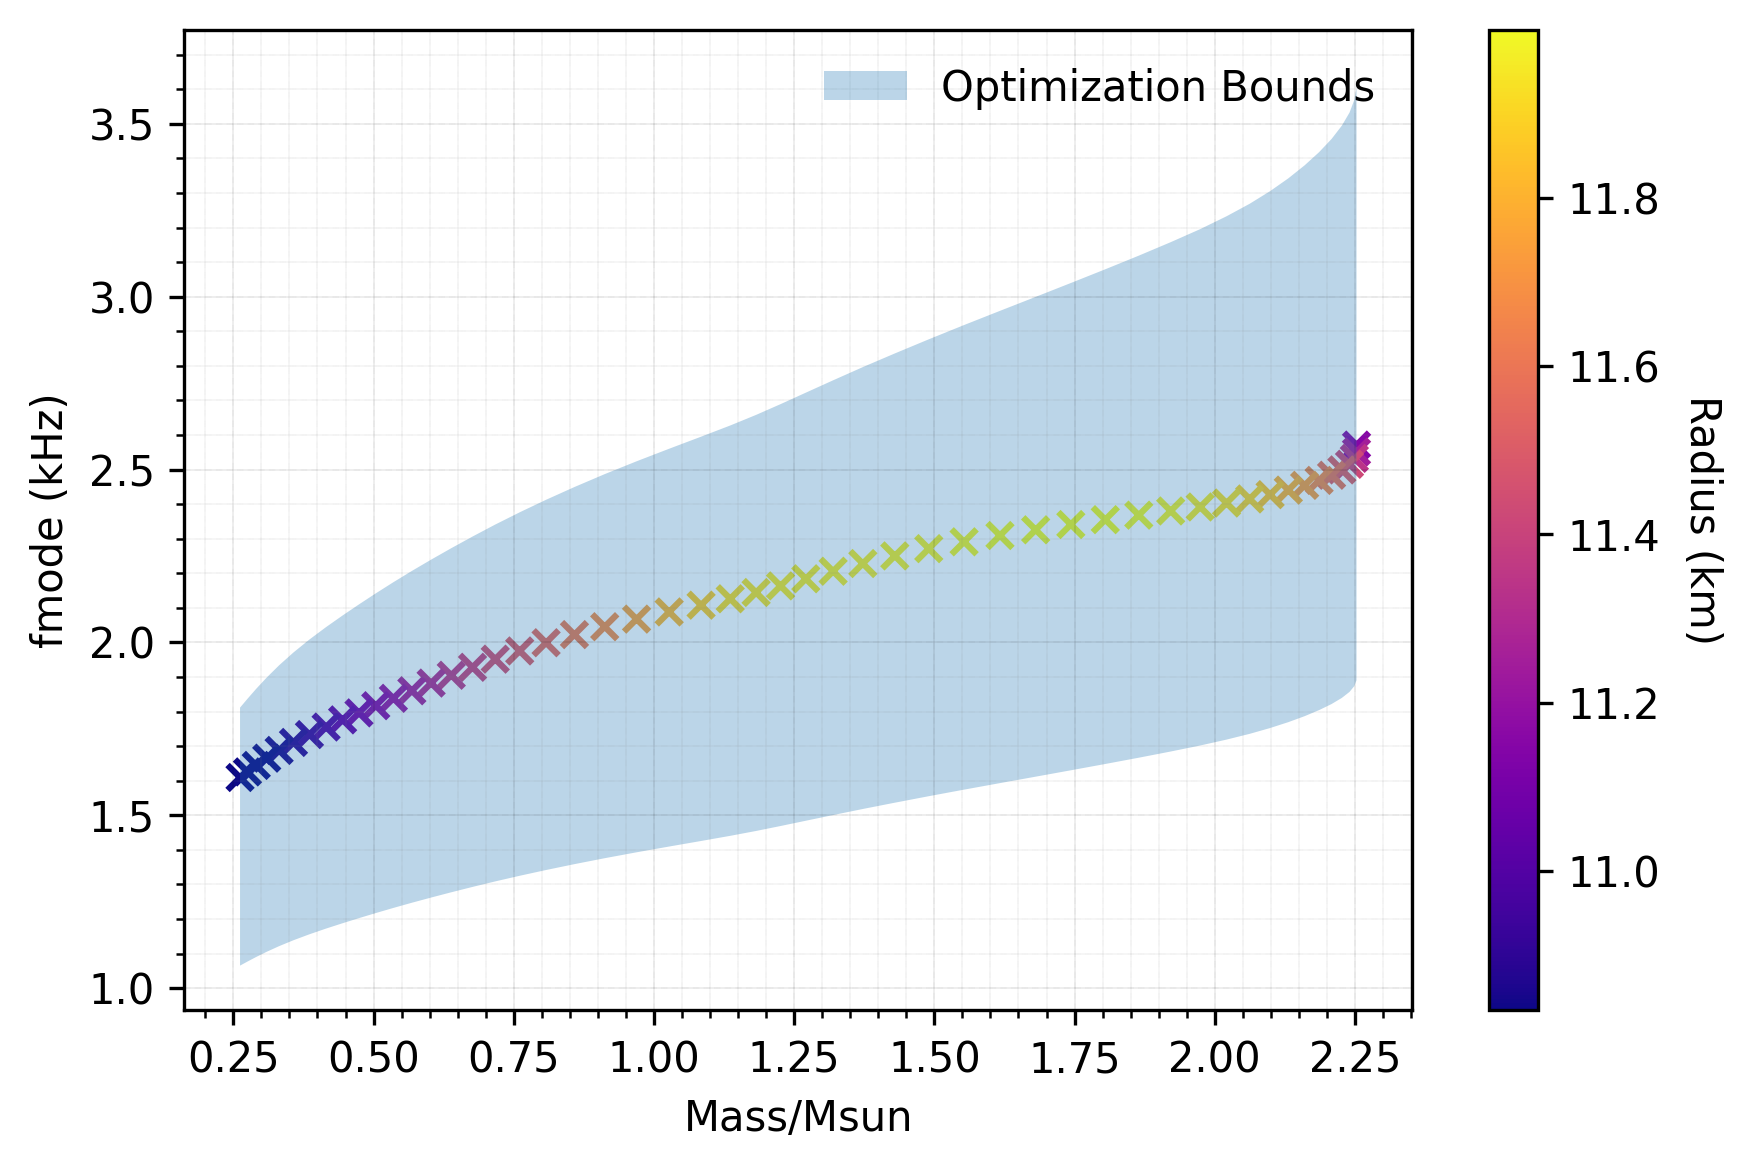

[STATUS] Completed eos_1246...


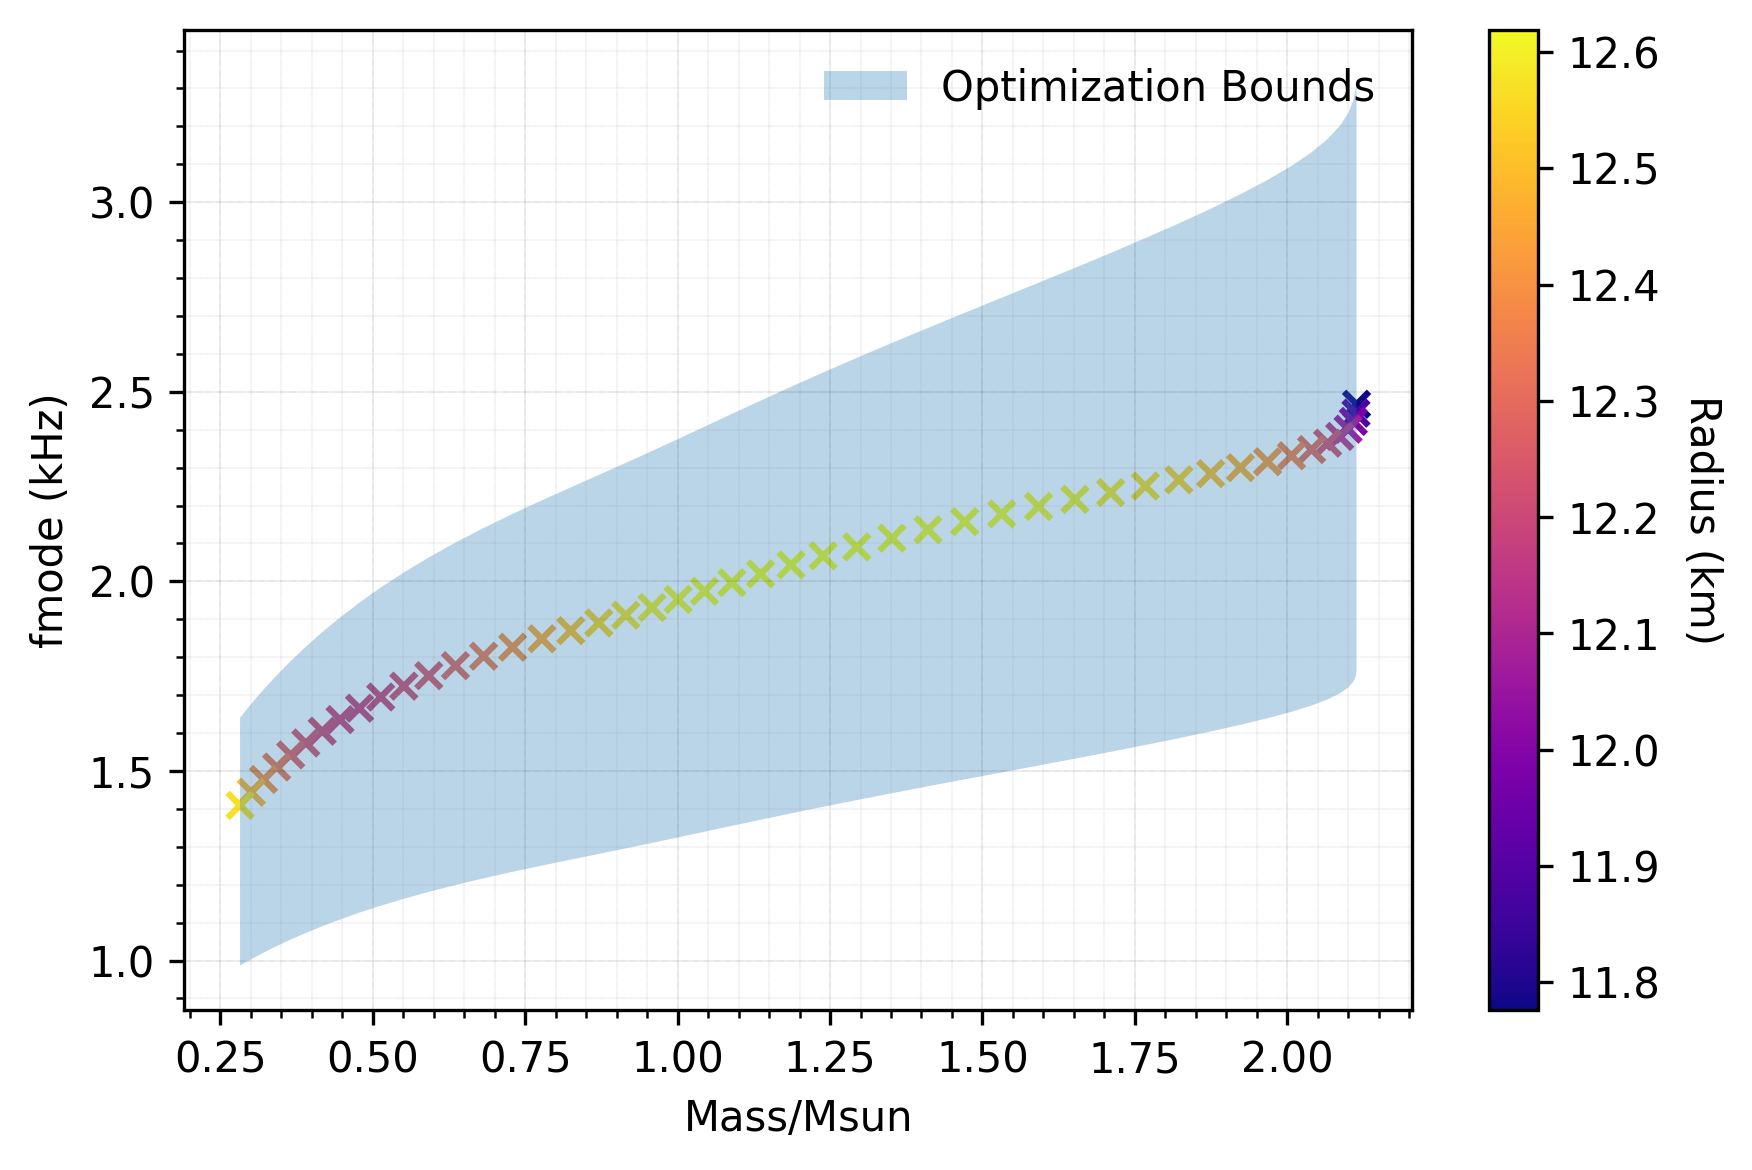

[STATUS] Completed eos_1247...


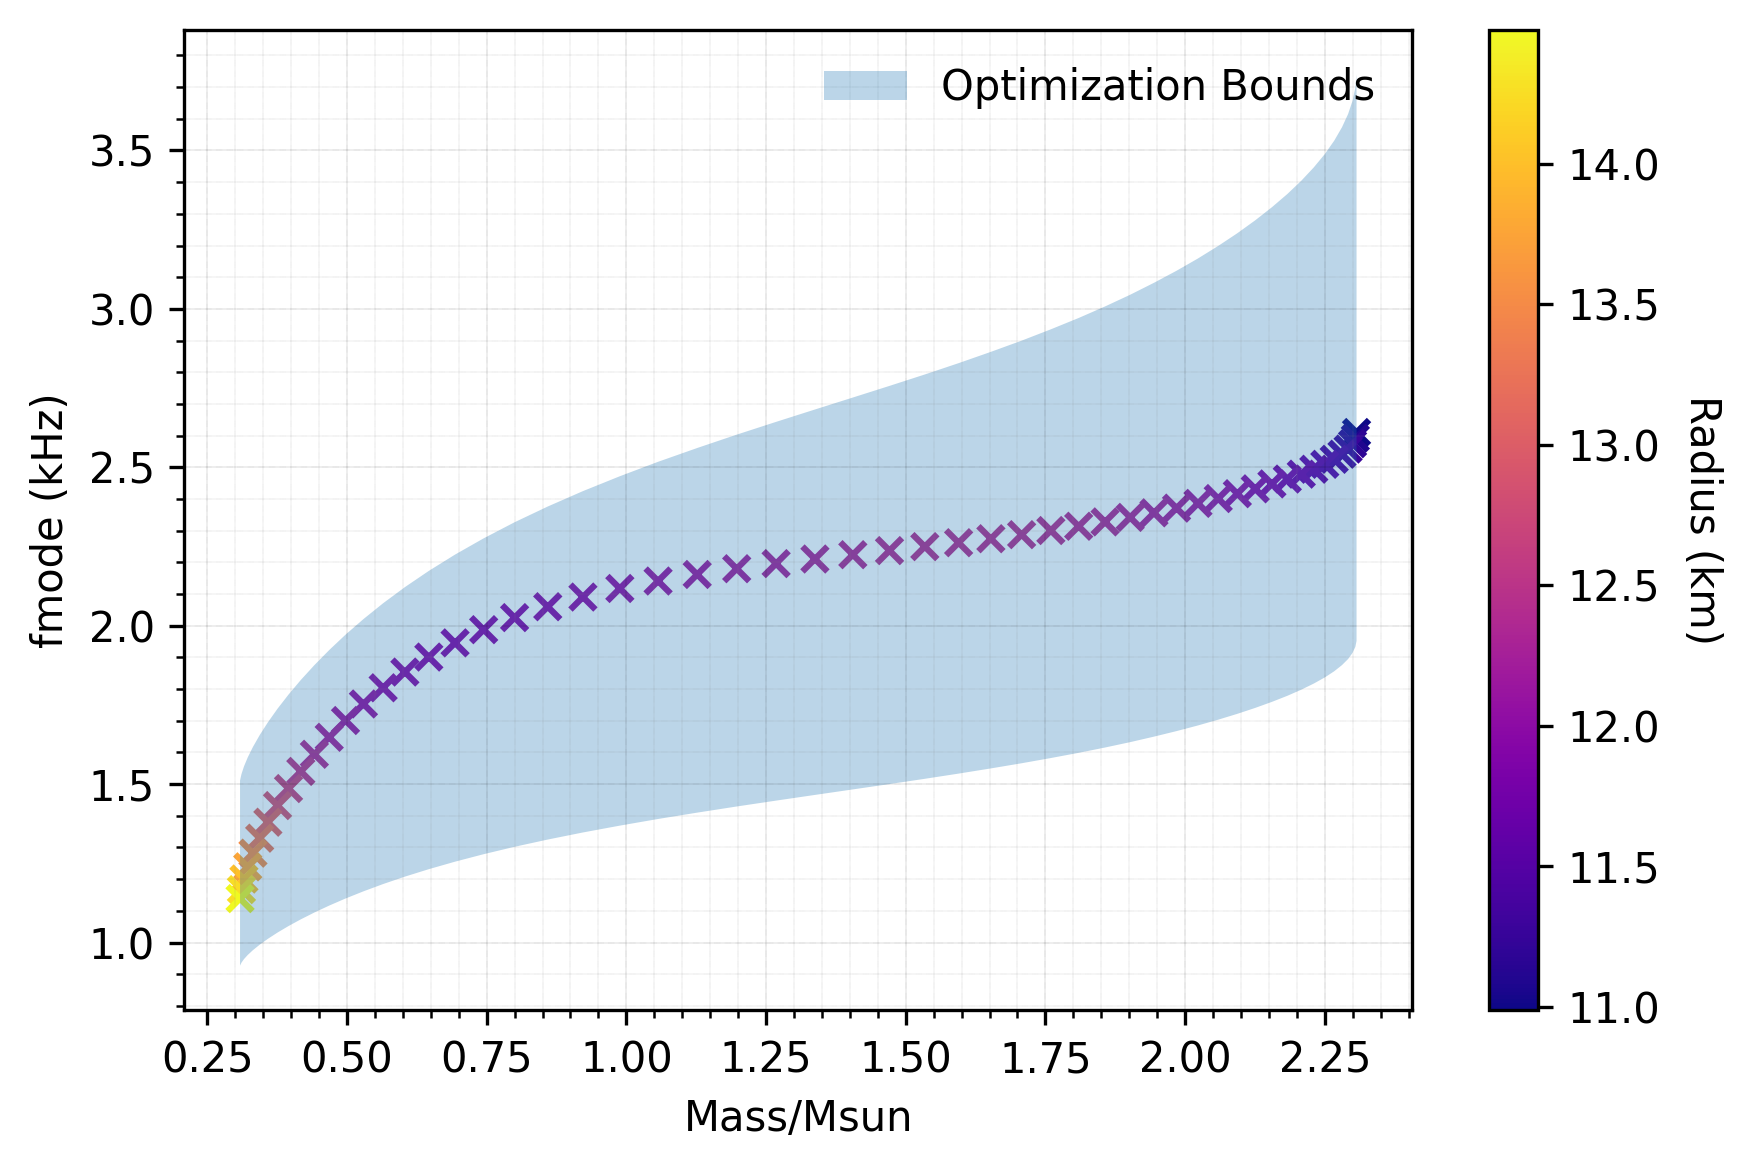

[STATUS] Completed eos_1248...


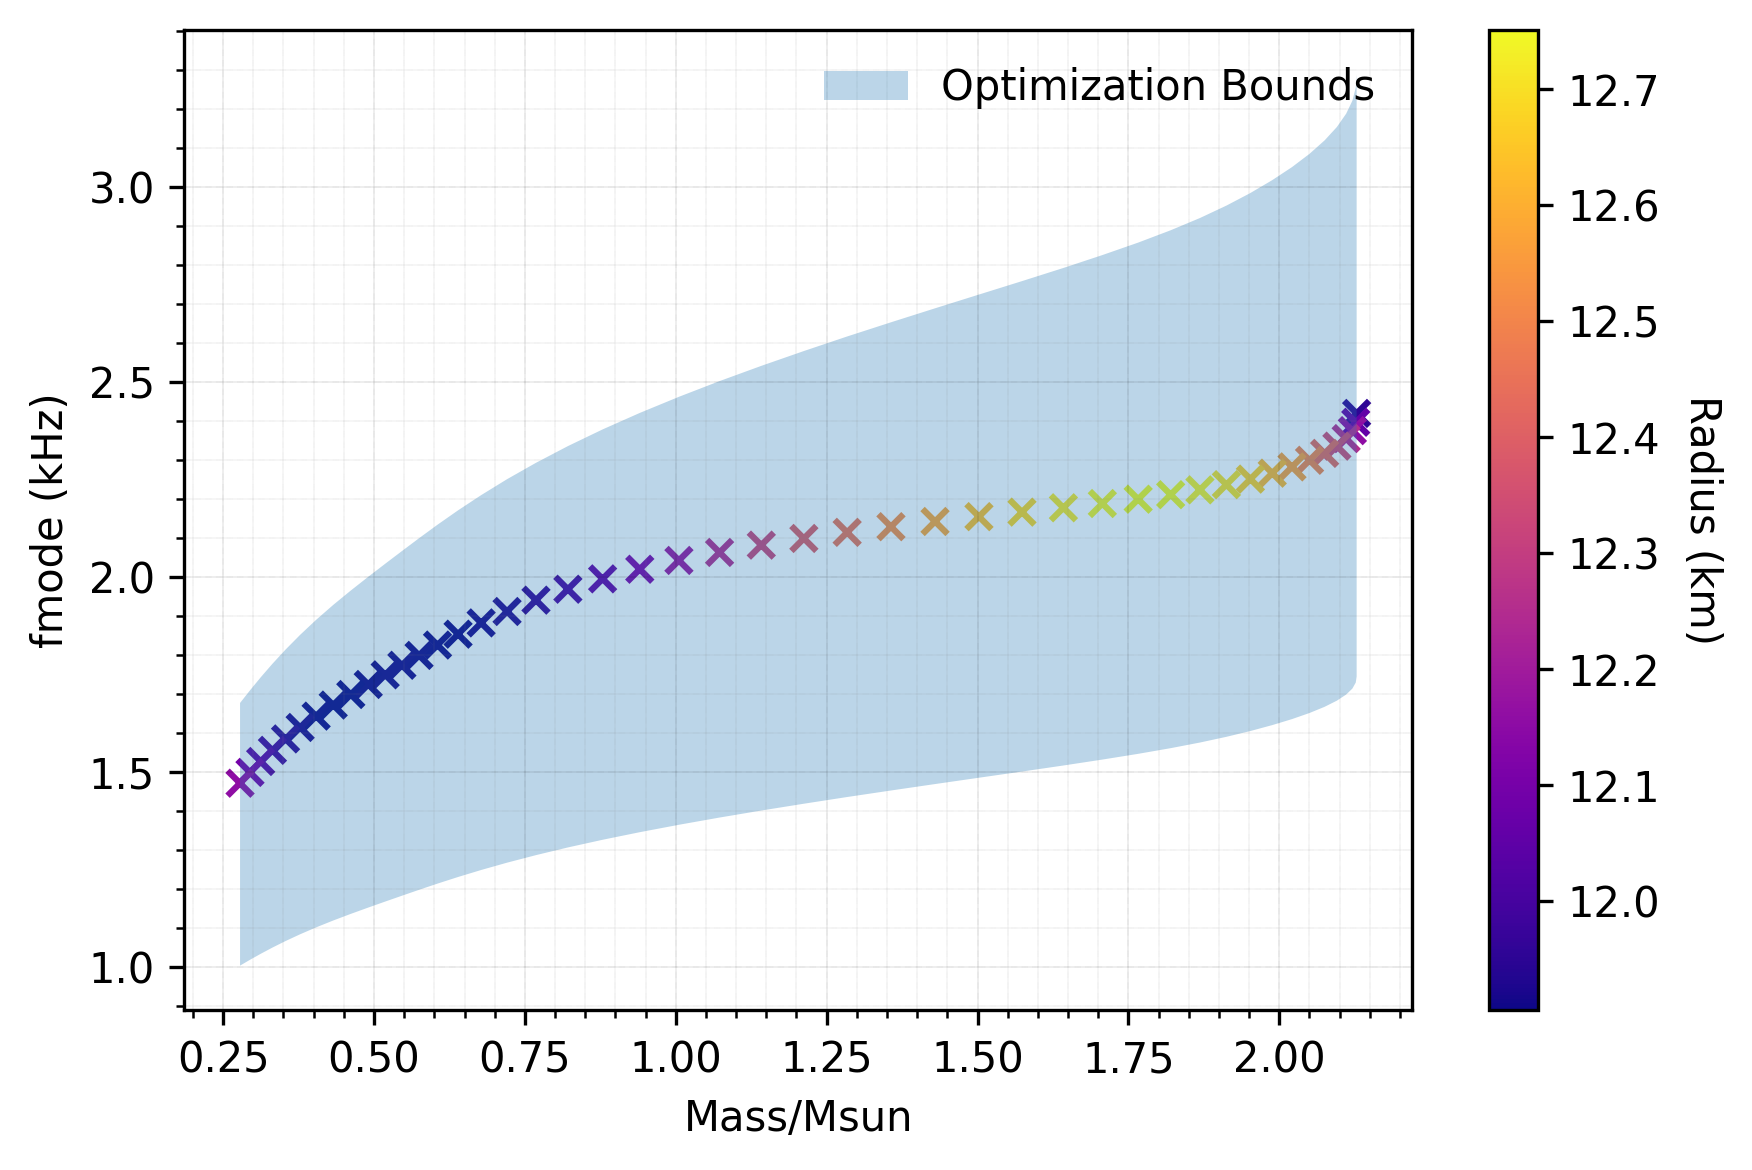

[STATUS] Completed eos_1249...


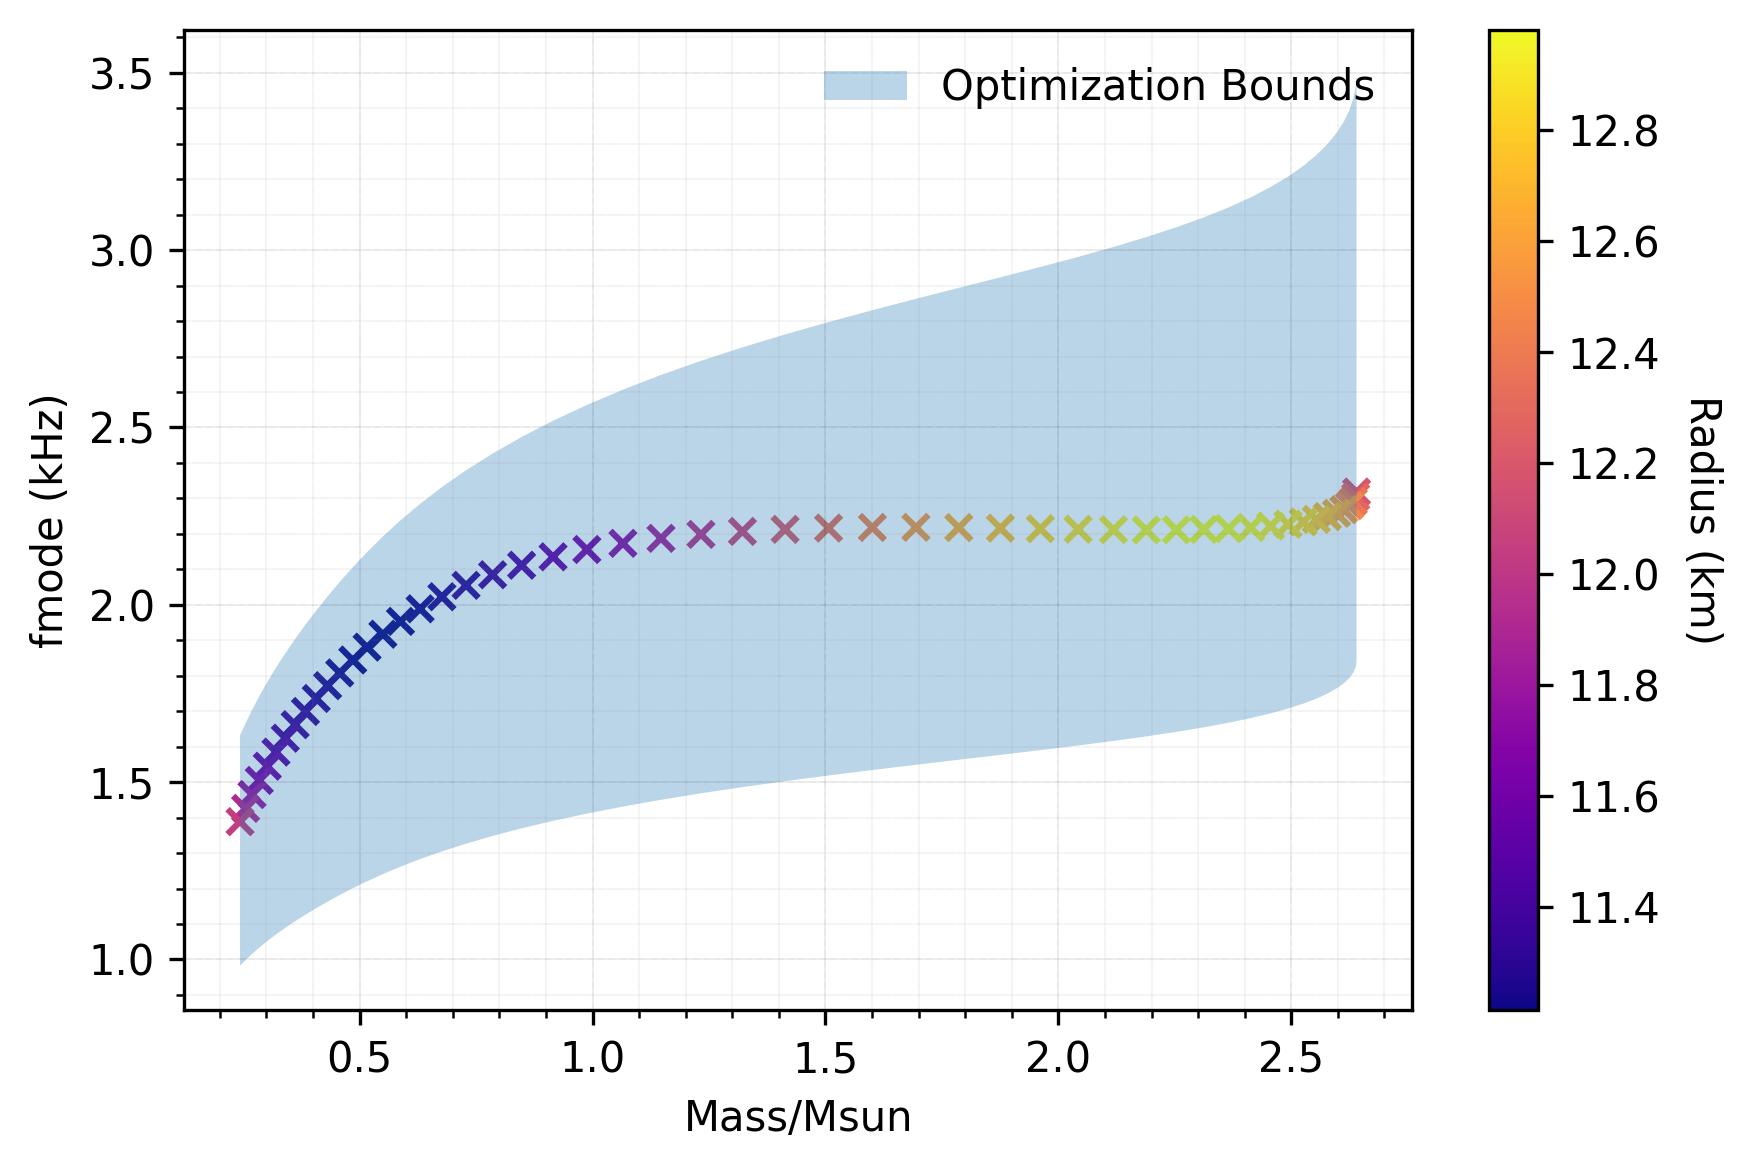

[STATUS] Completed eos_125...


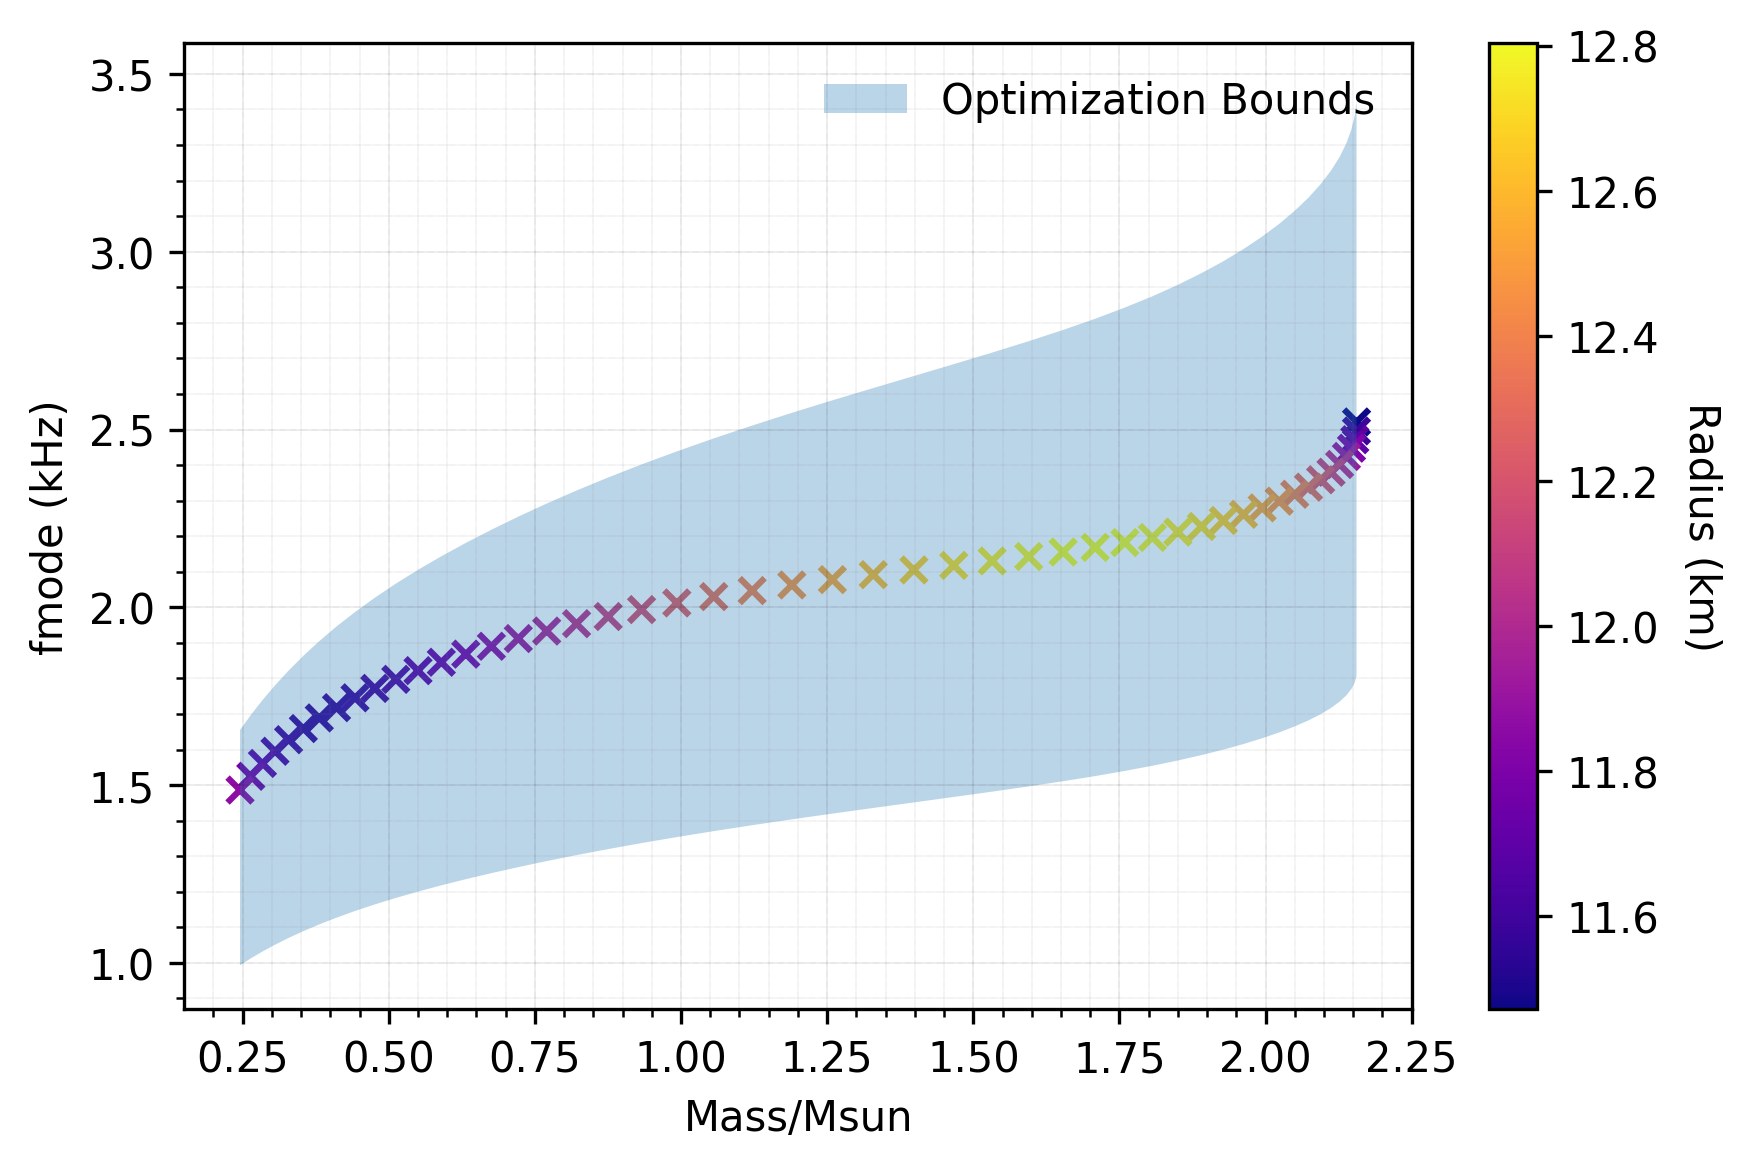

[STATUS] Completed eos_1250...


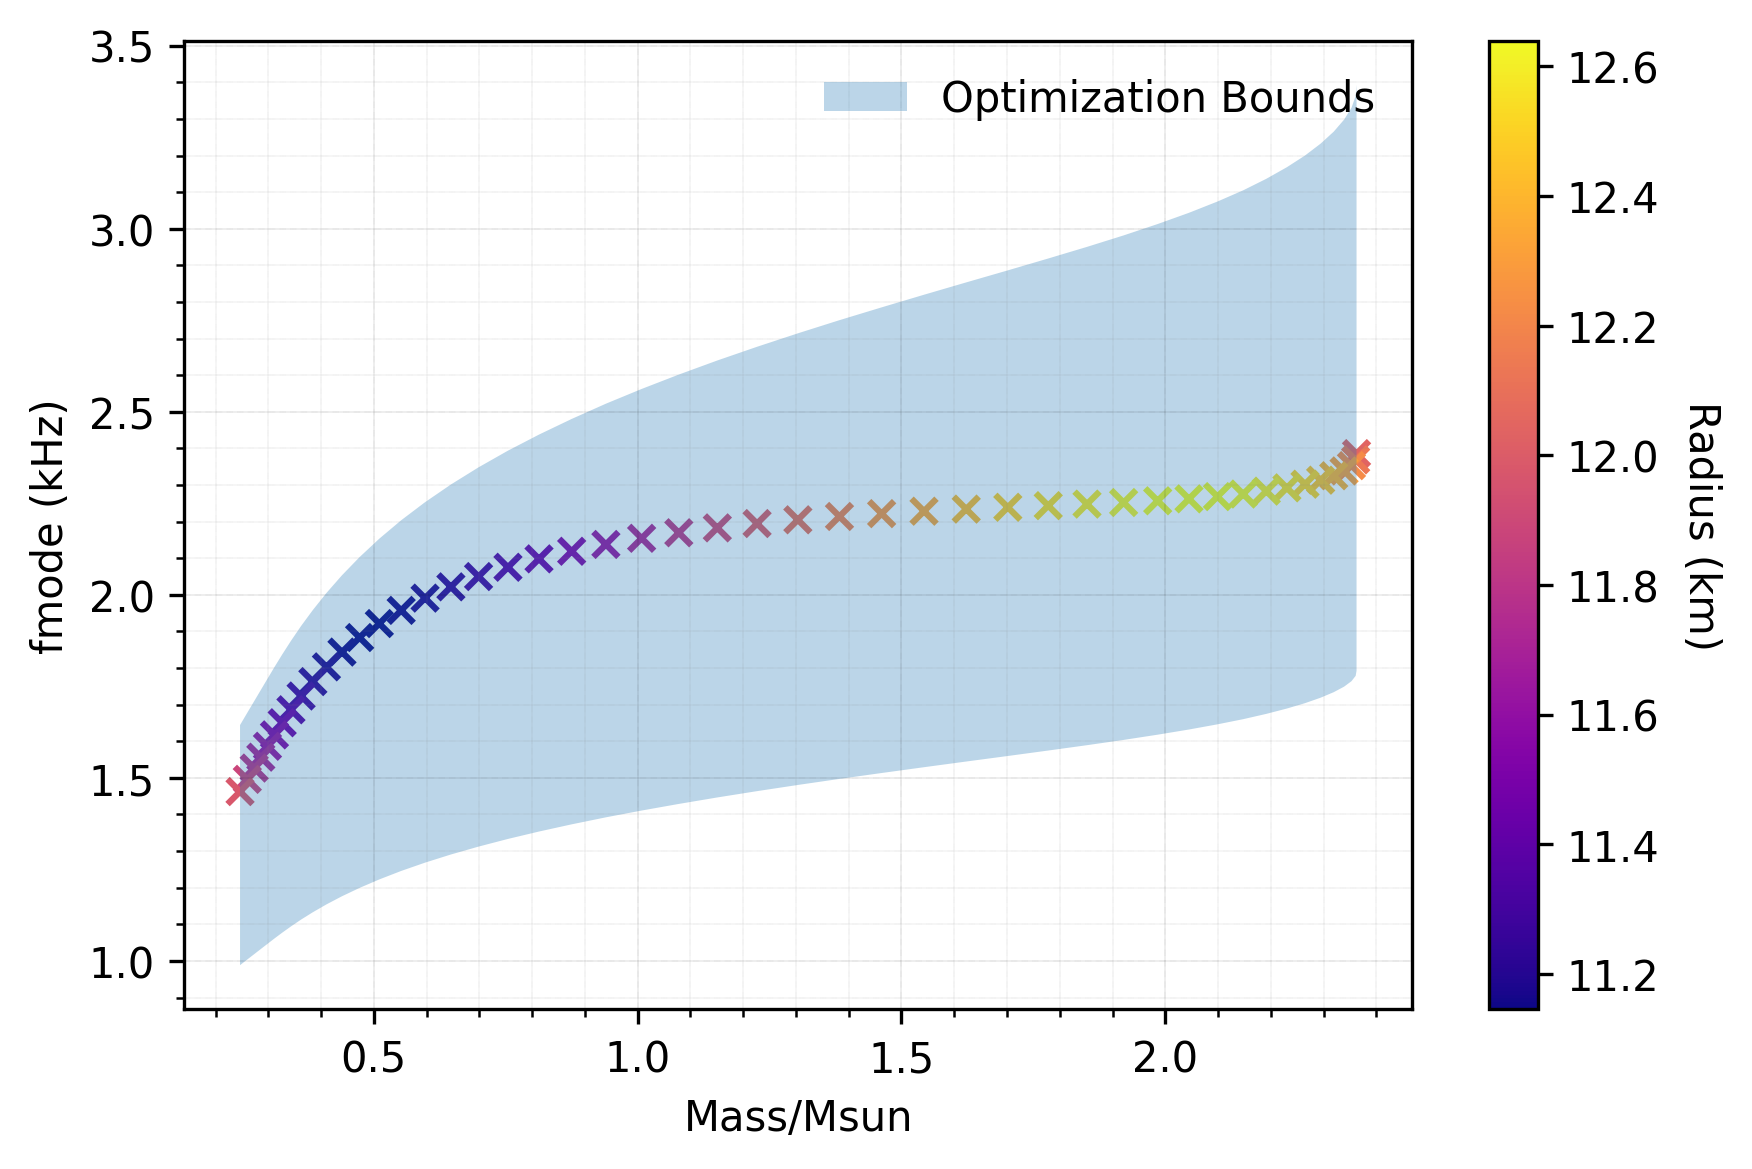

[STATUS] Completed eos_1251...


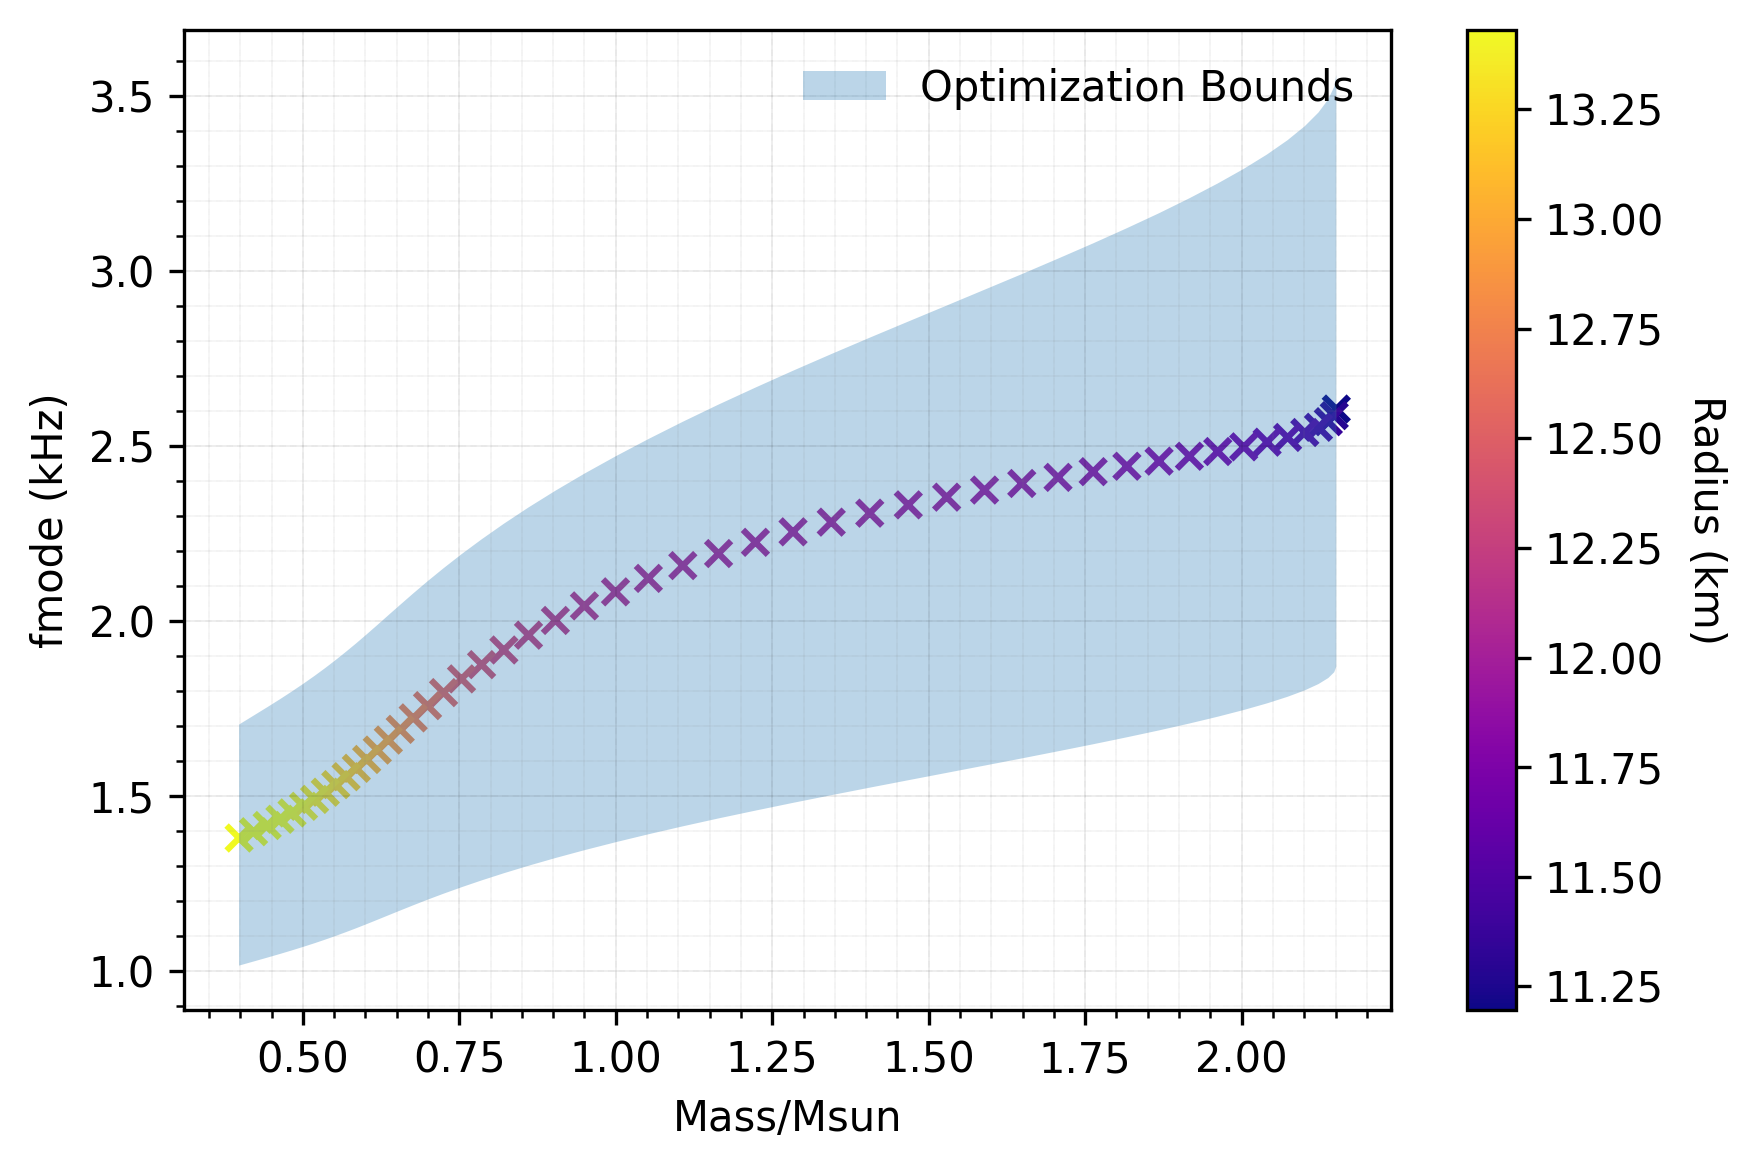

[STATUS] Completed eos_1252...


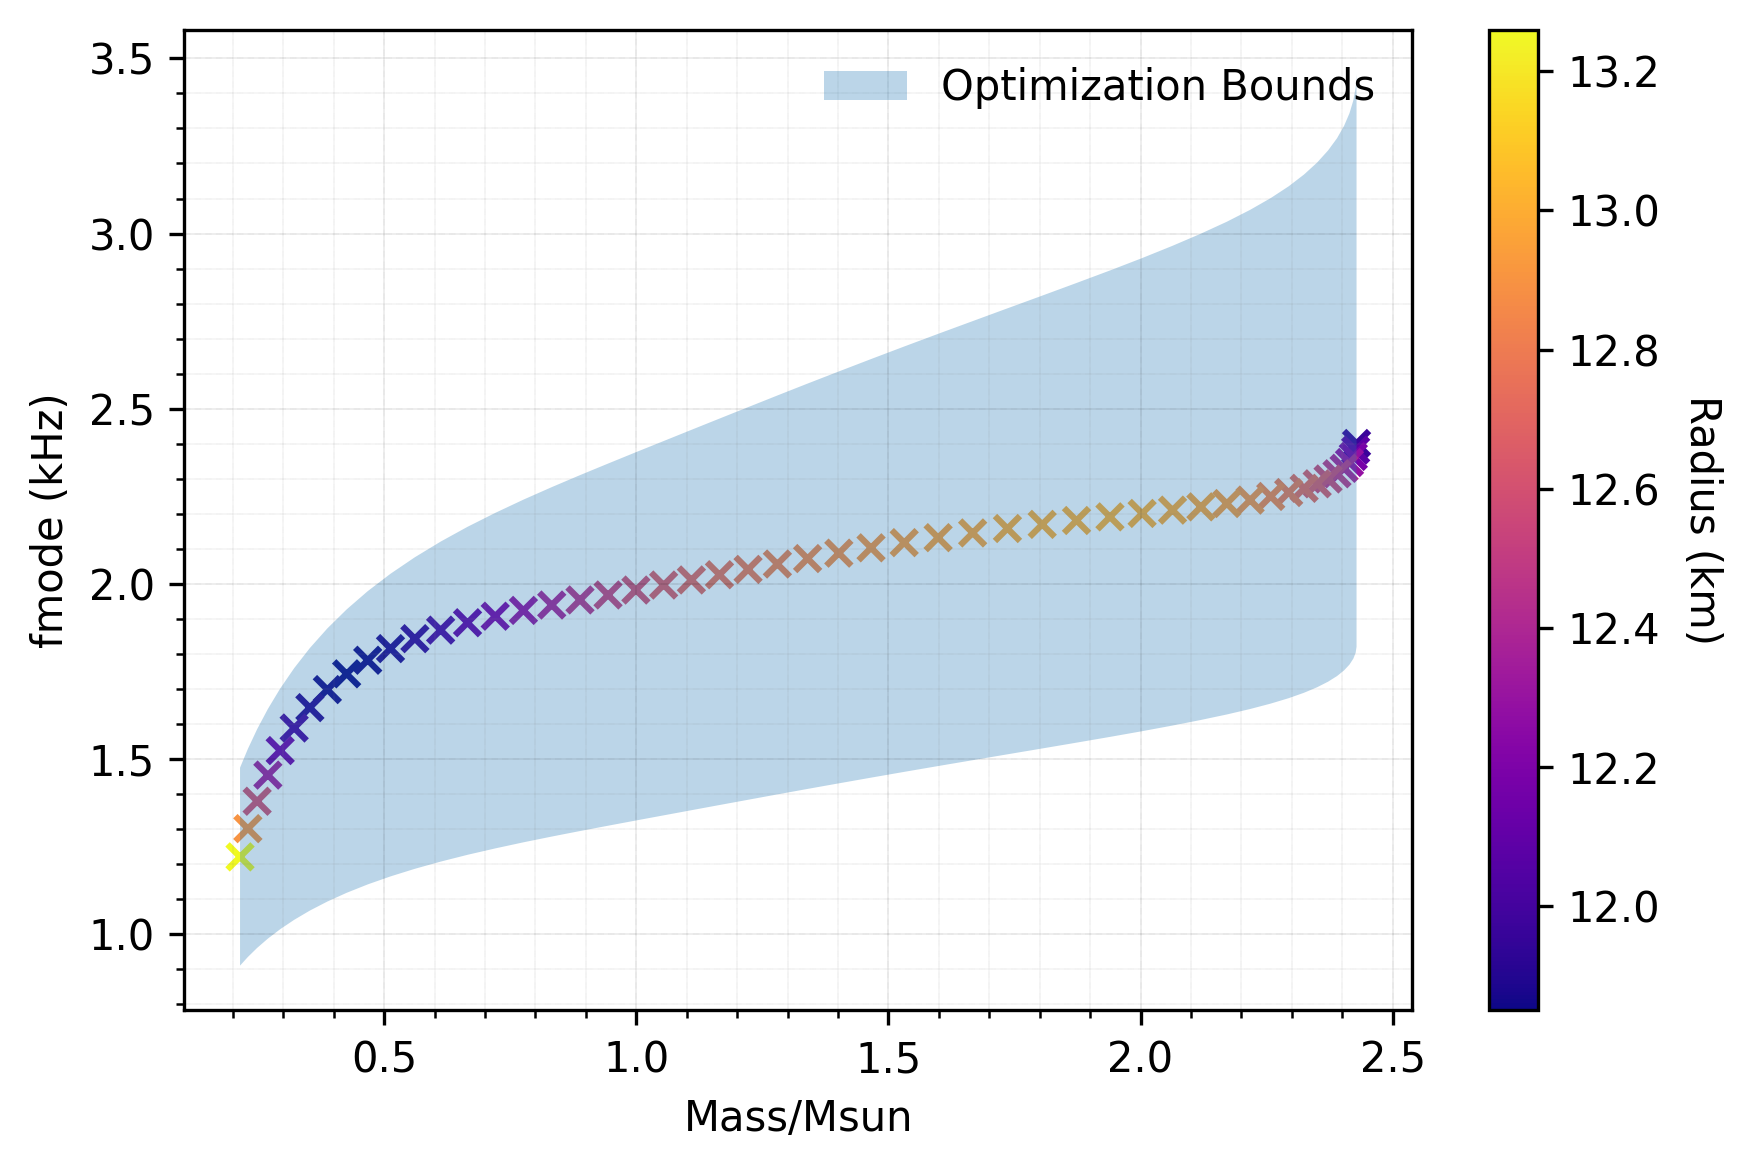

[STATUS] Completed eos_1253...


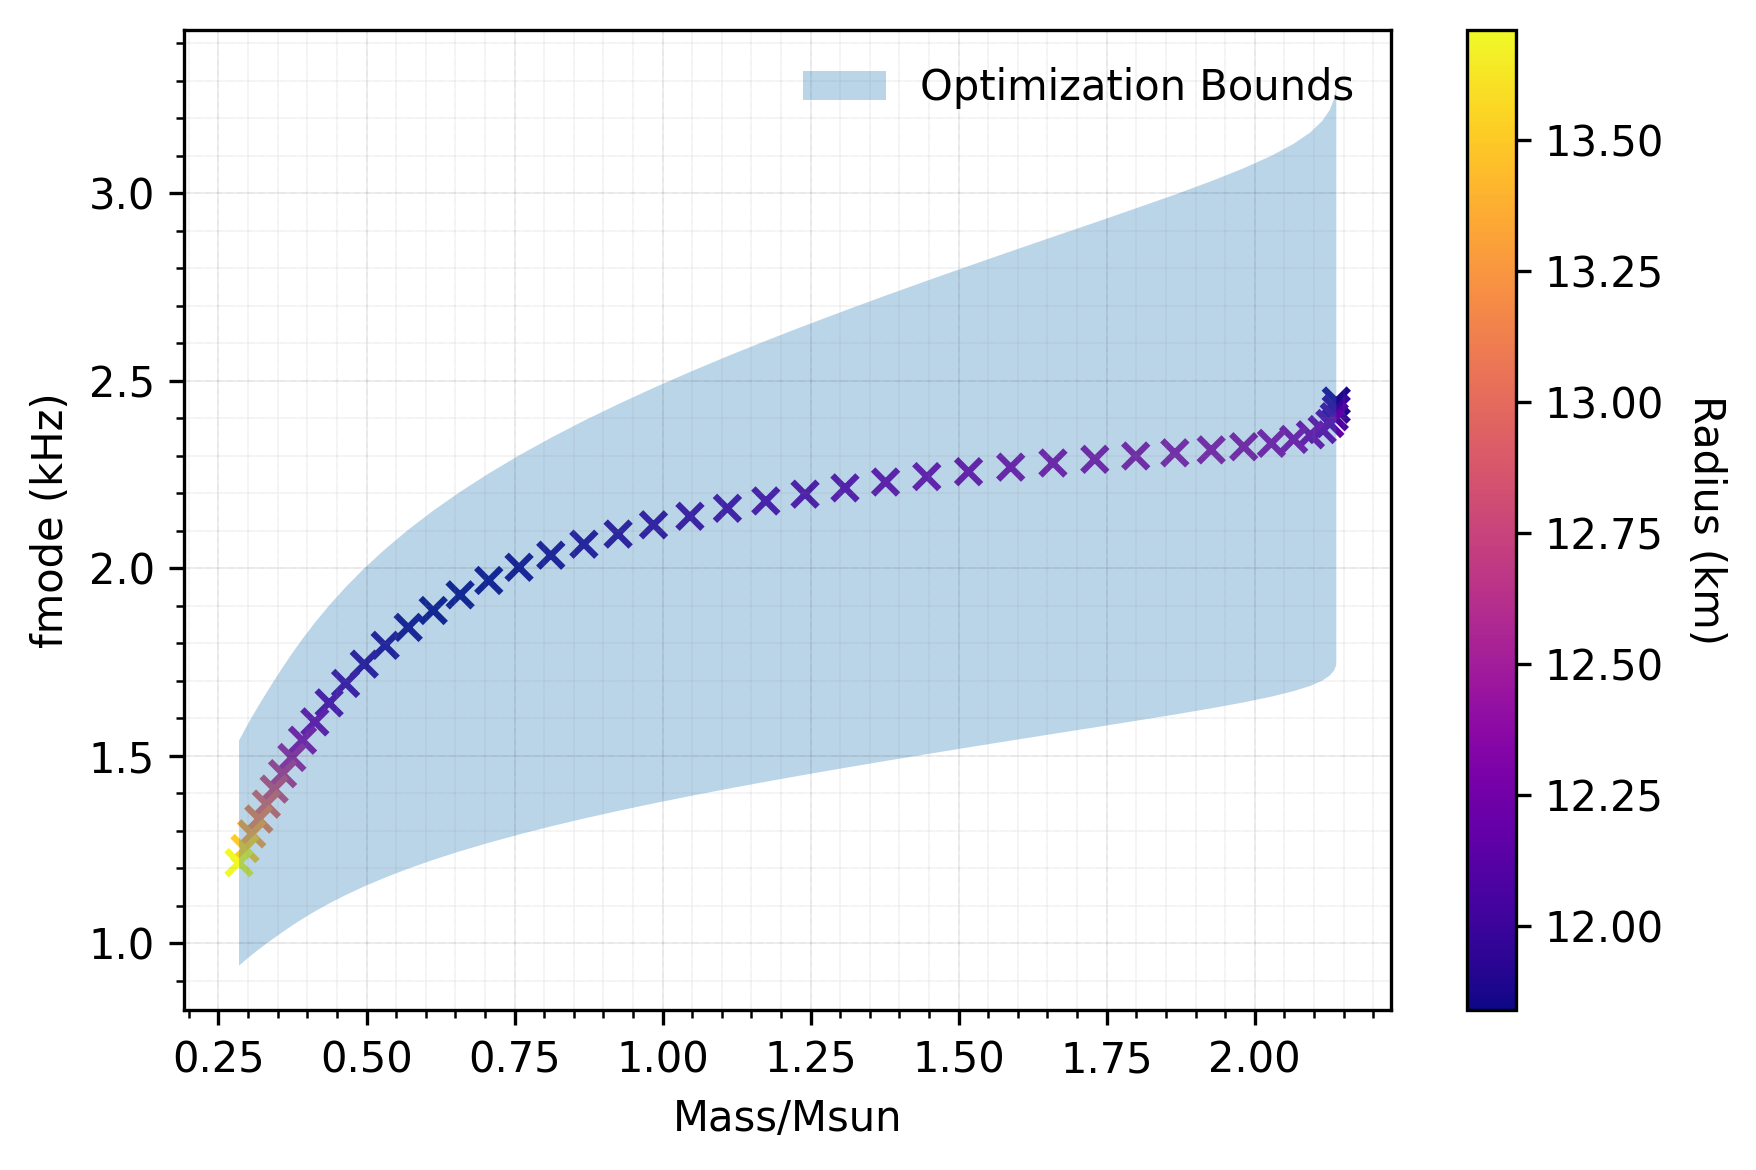

[STATUS] Completed eos_1254...


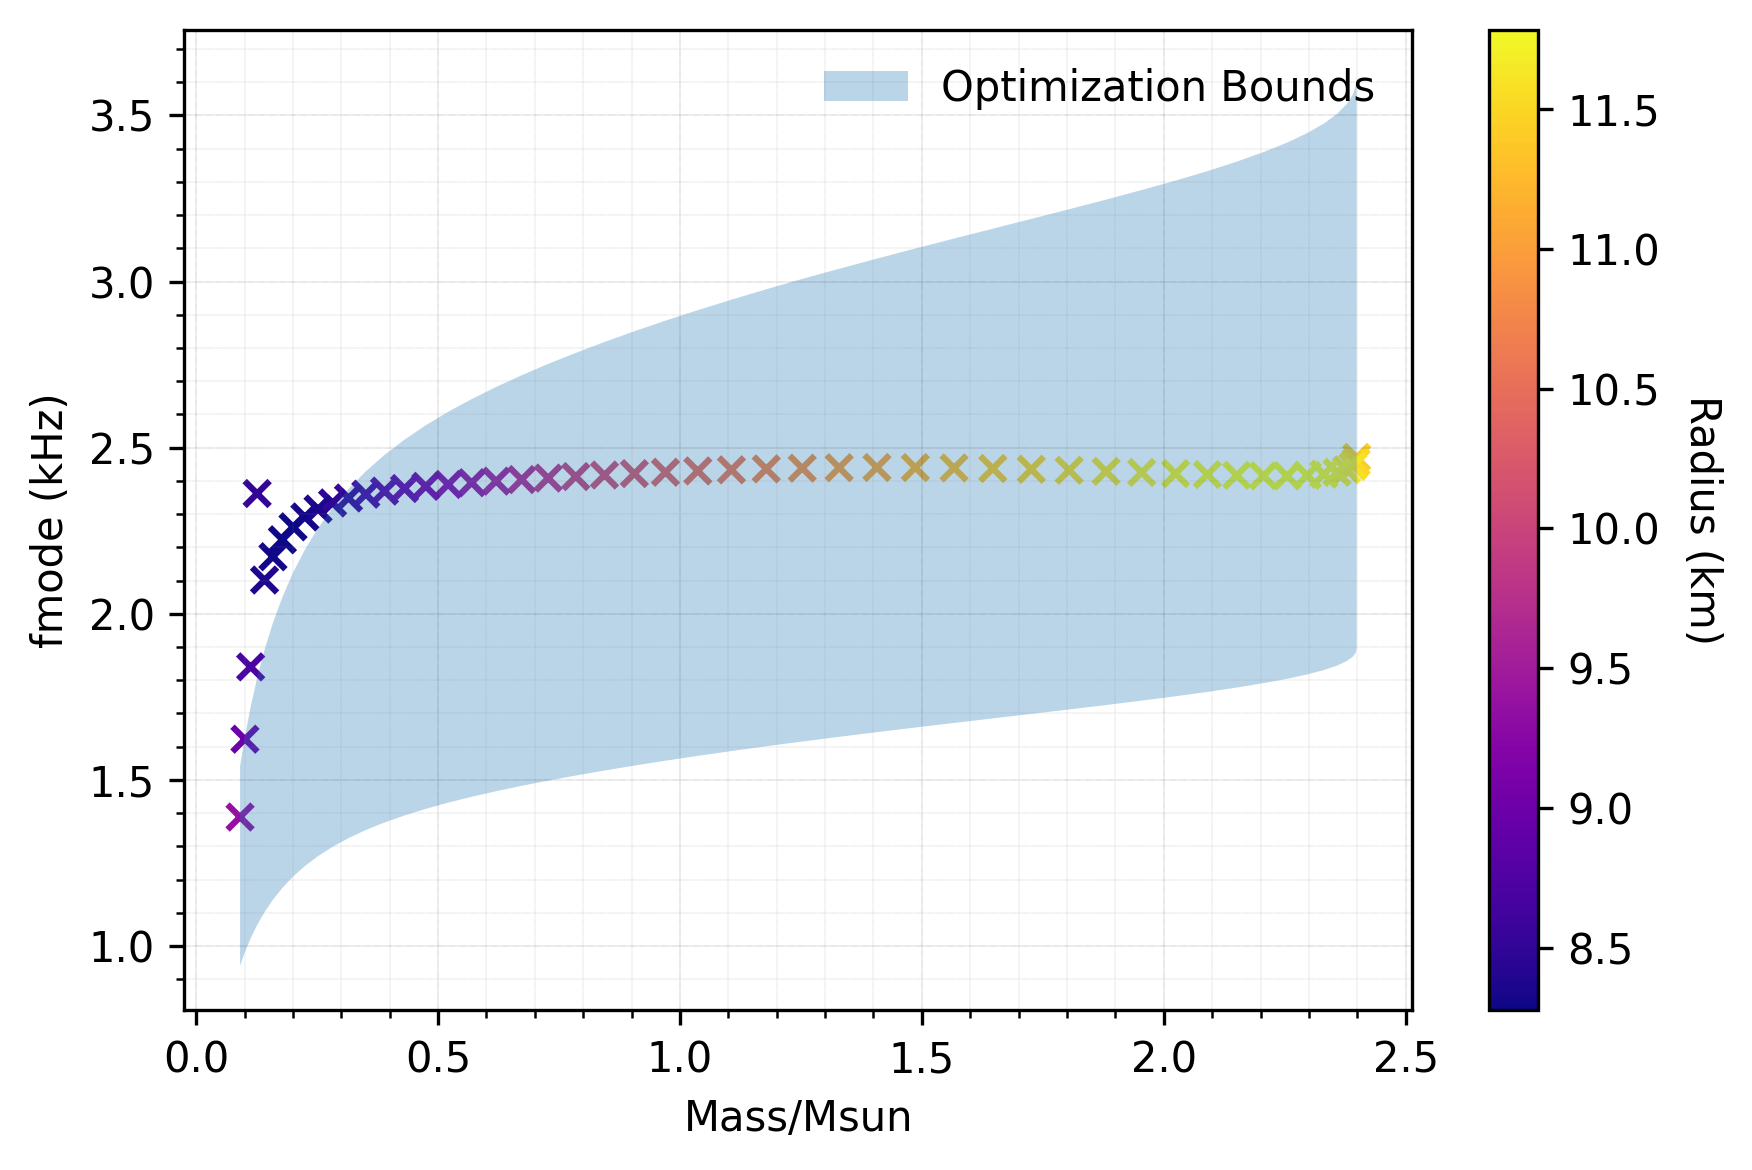

[STATUS] Completed eos_1255...


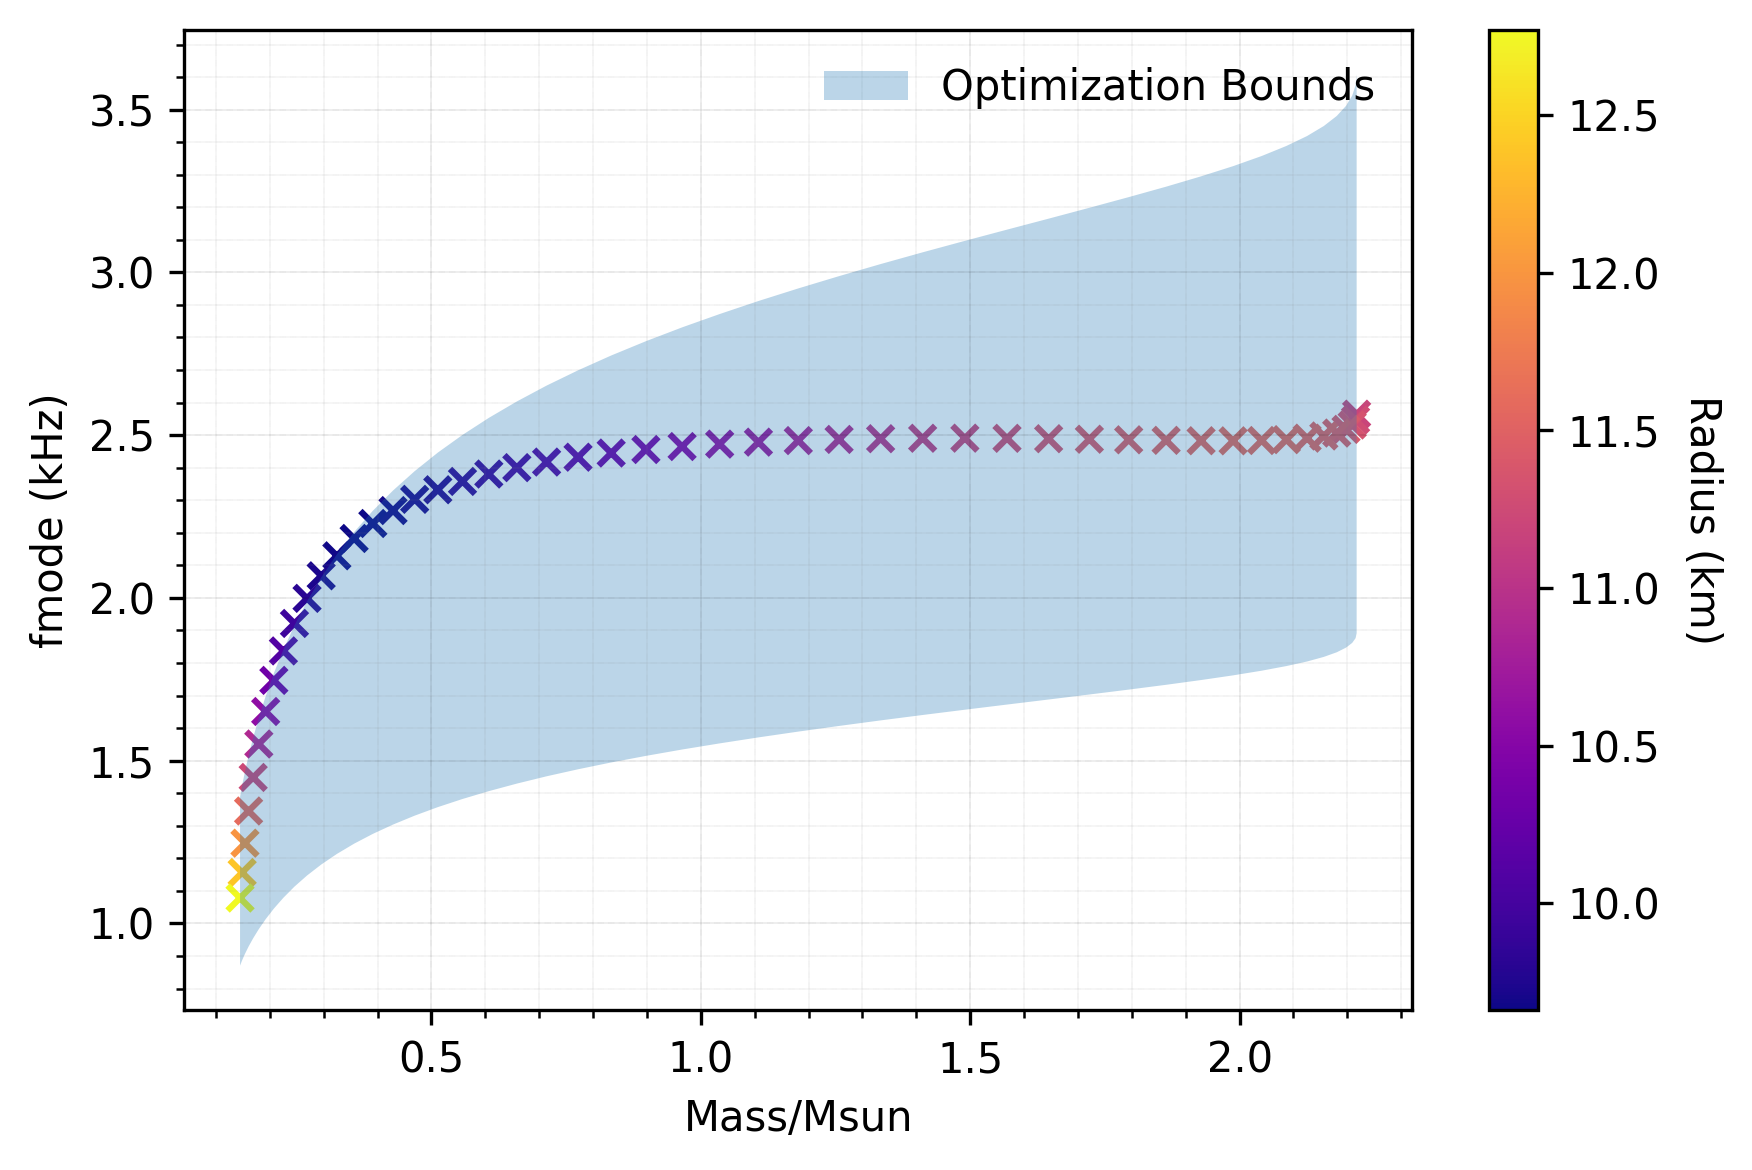

[STATUS] Completed eos_1256...


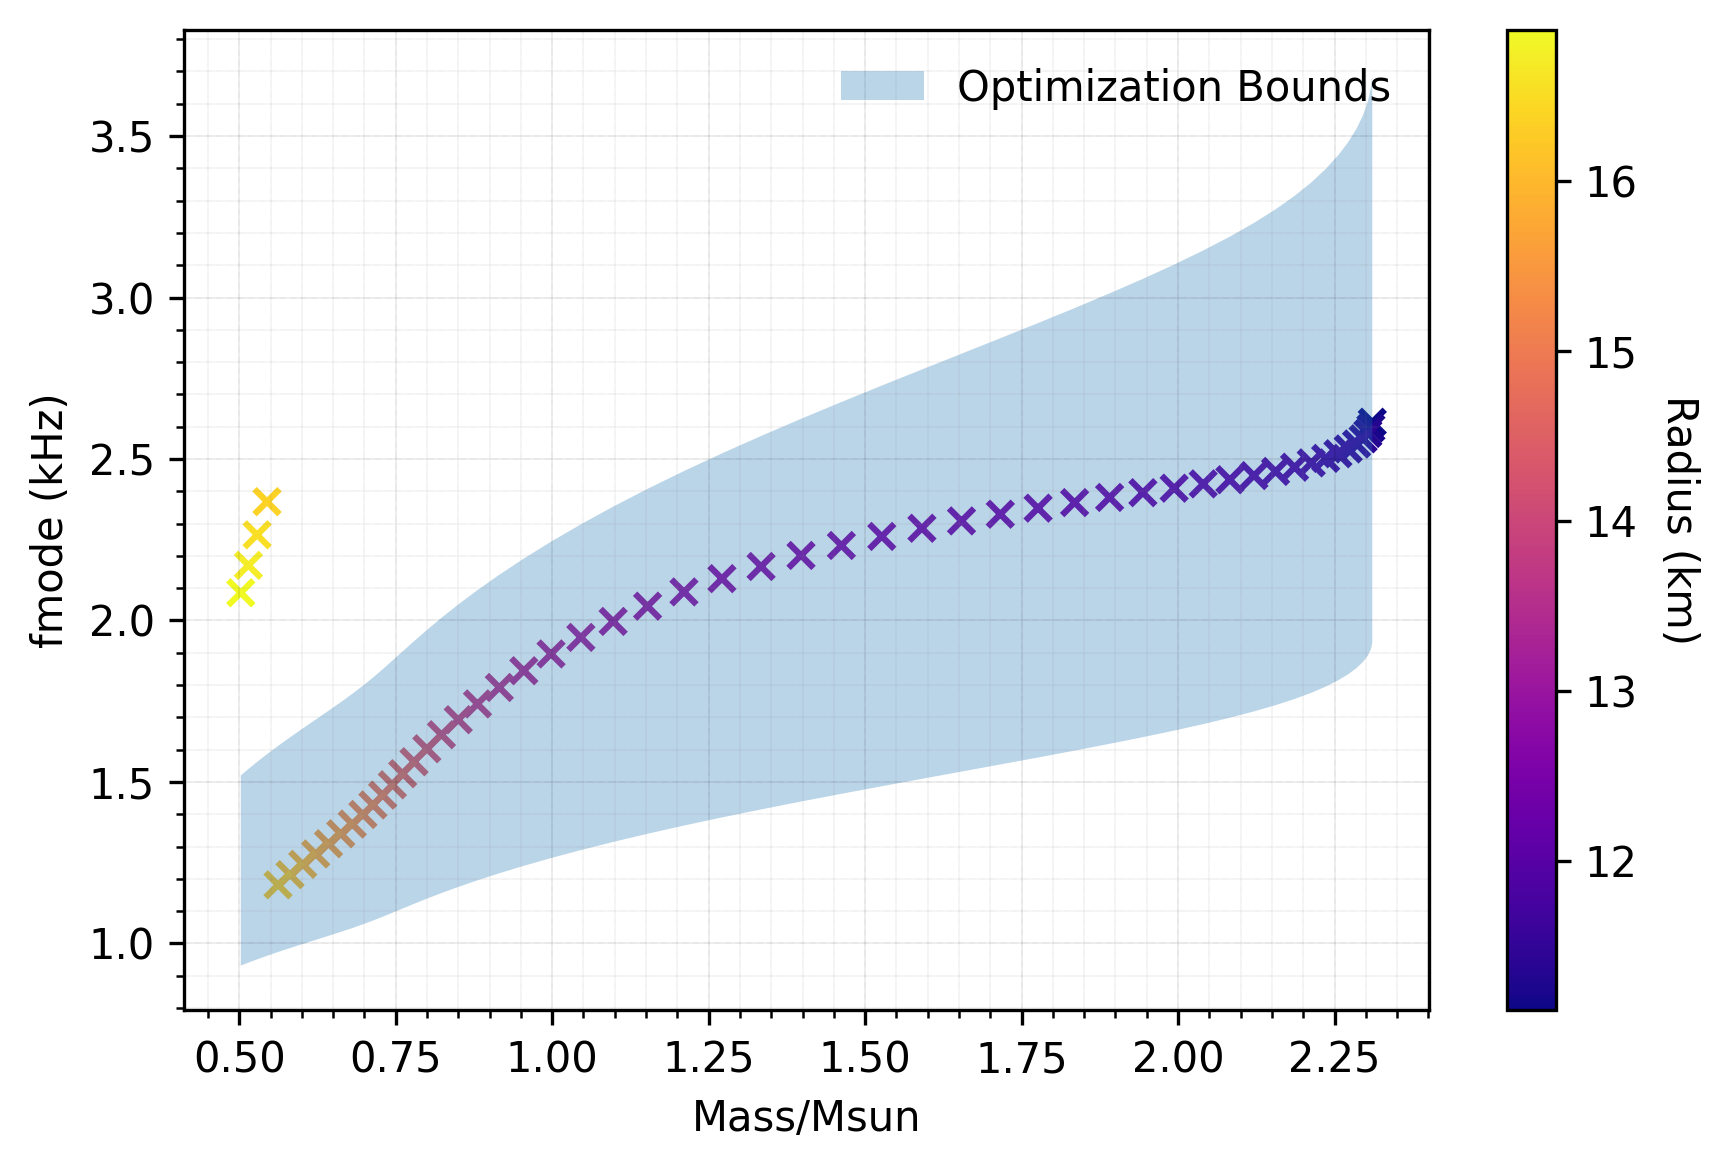

[STATUS] Completed eos_1257...


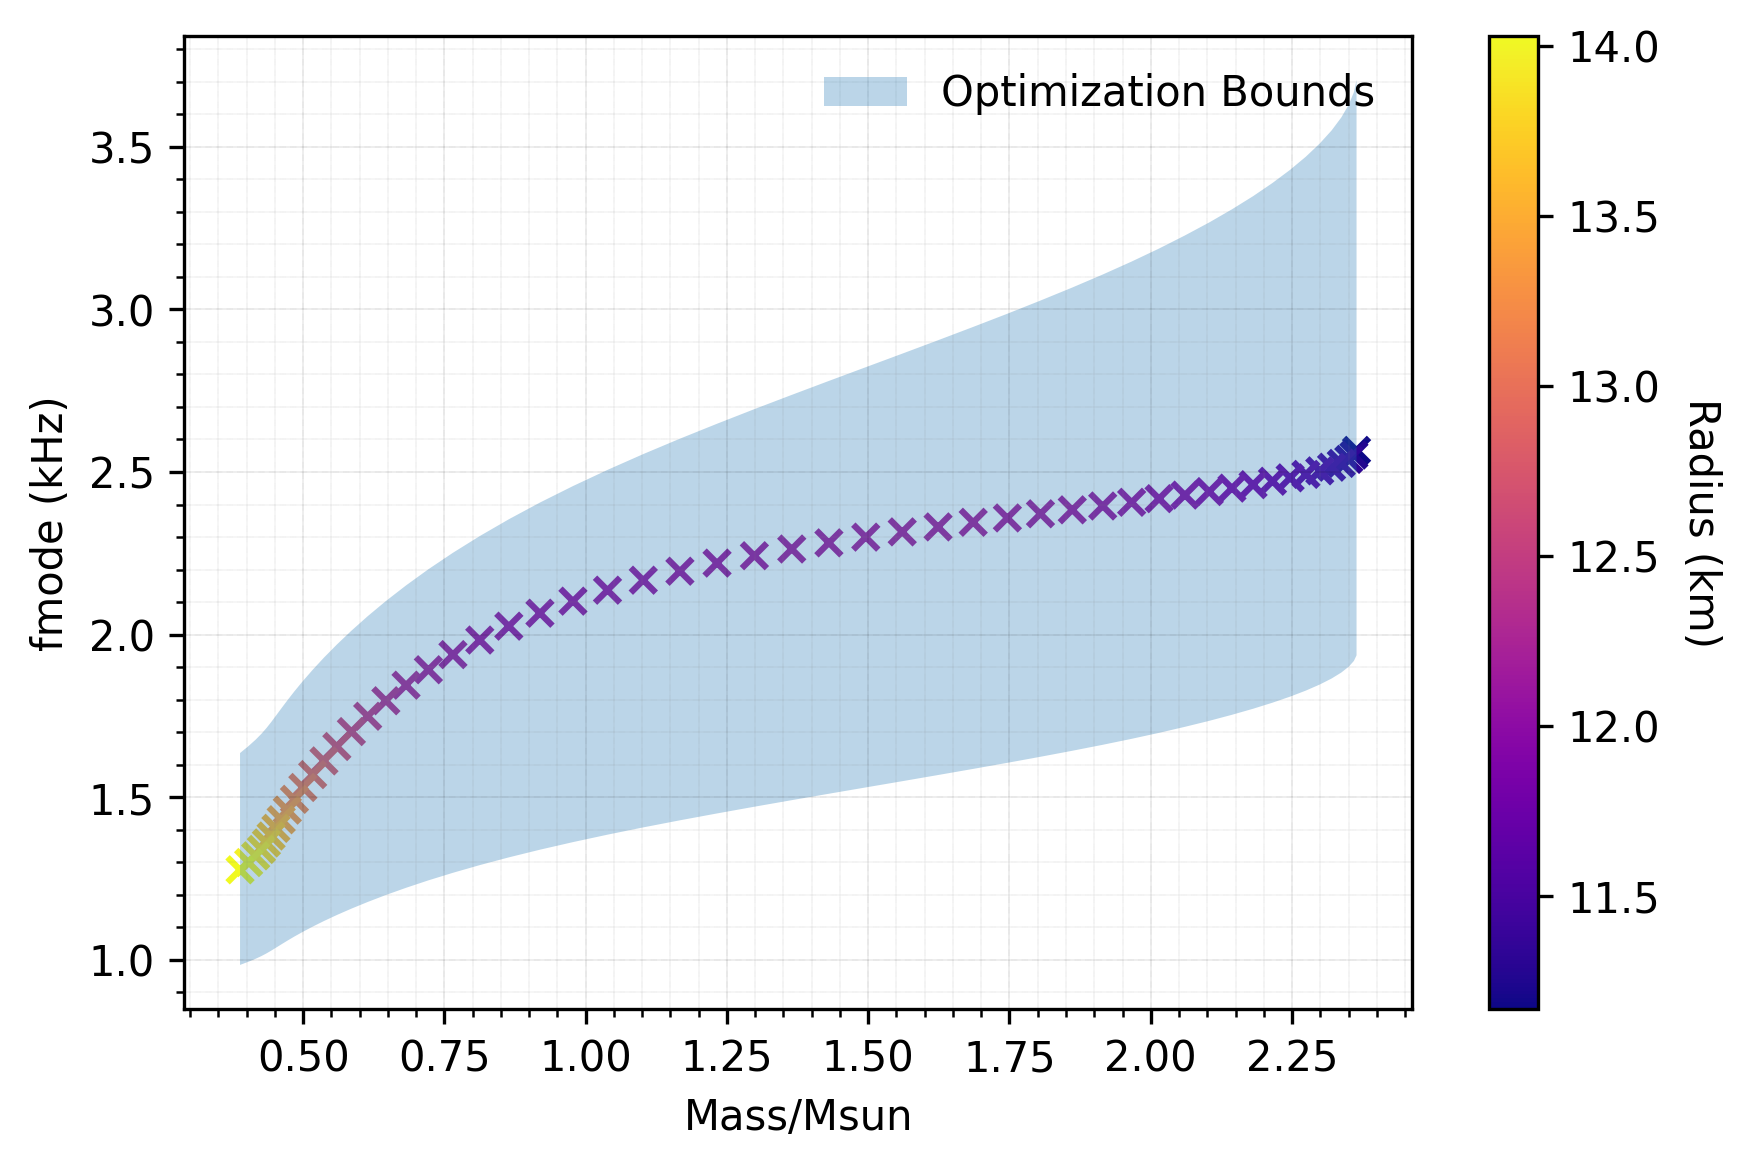

[STATUS] Completed eos_1258...


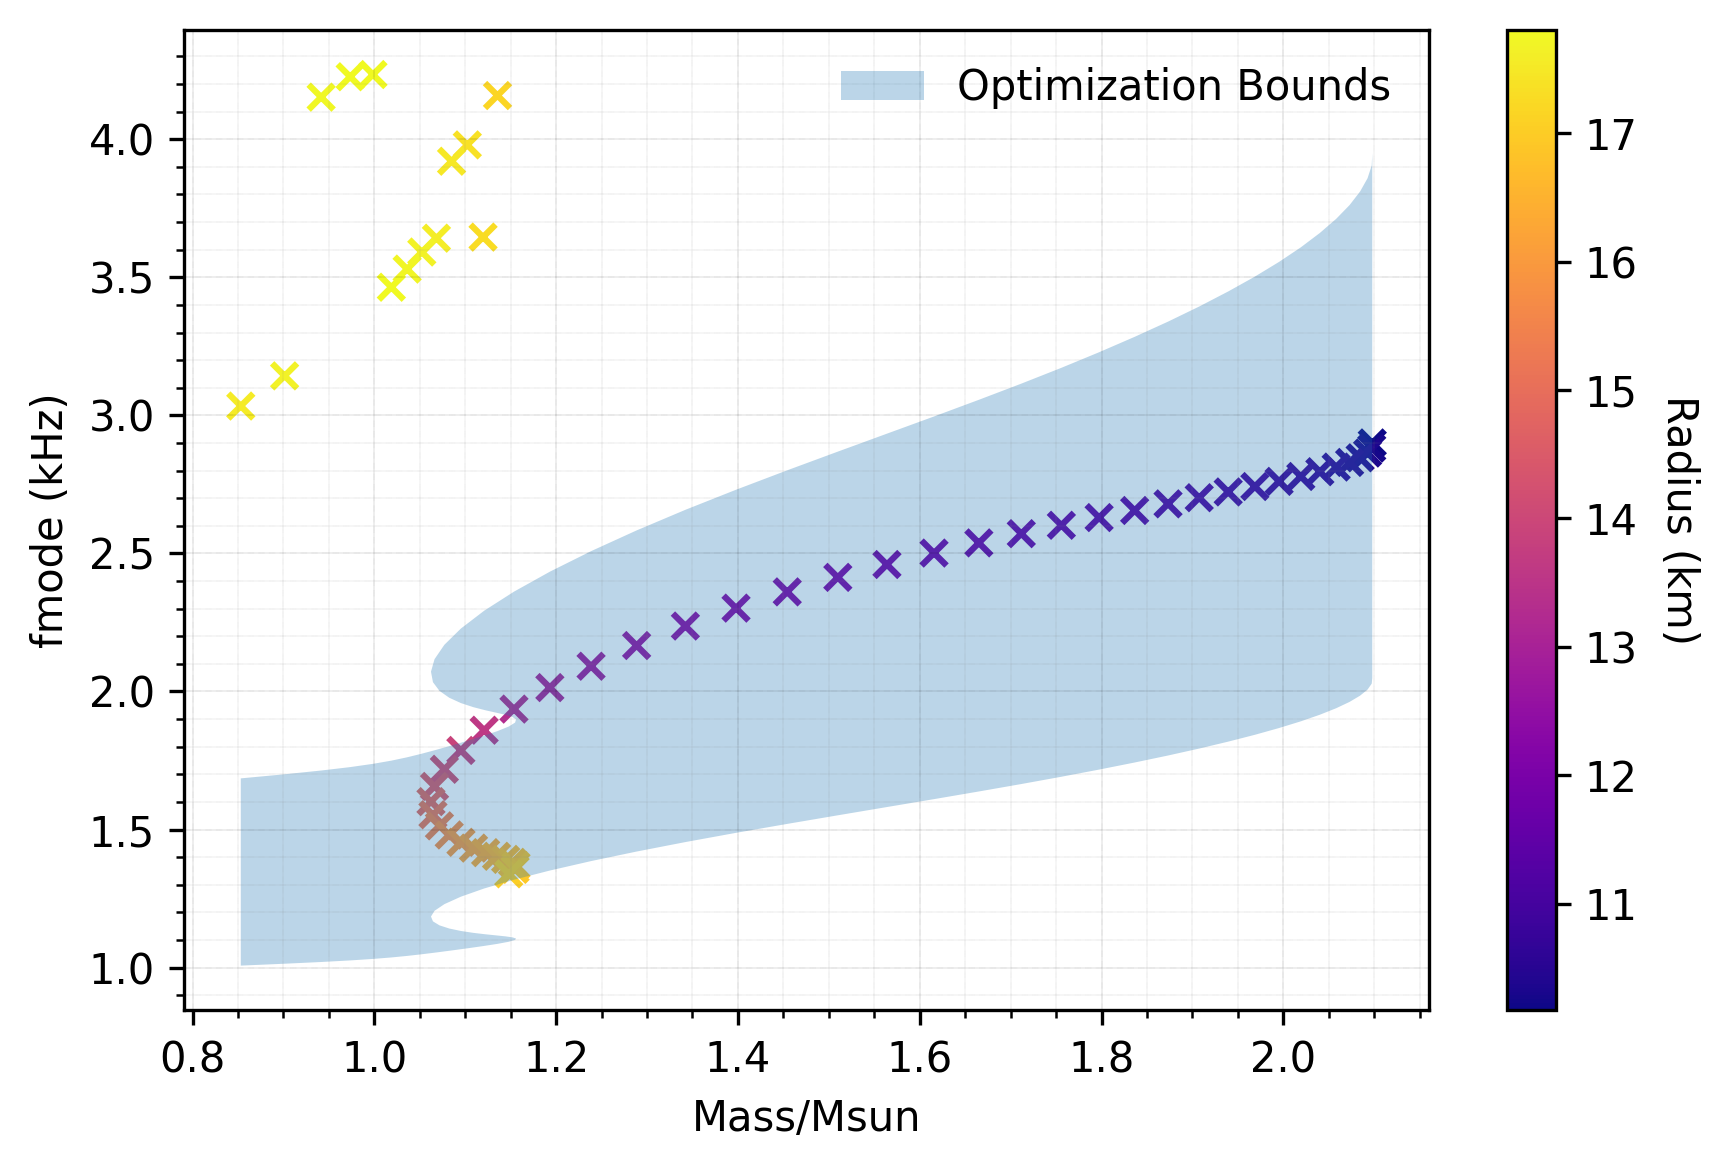

[STATUS] Completed eos_1259...


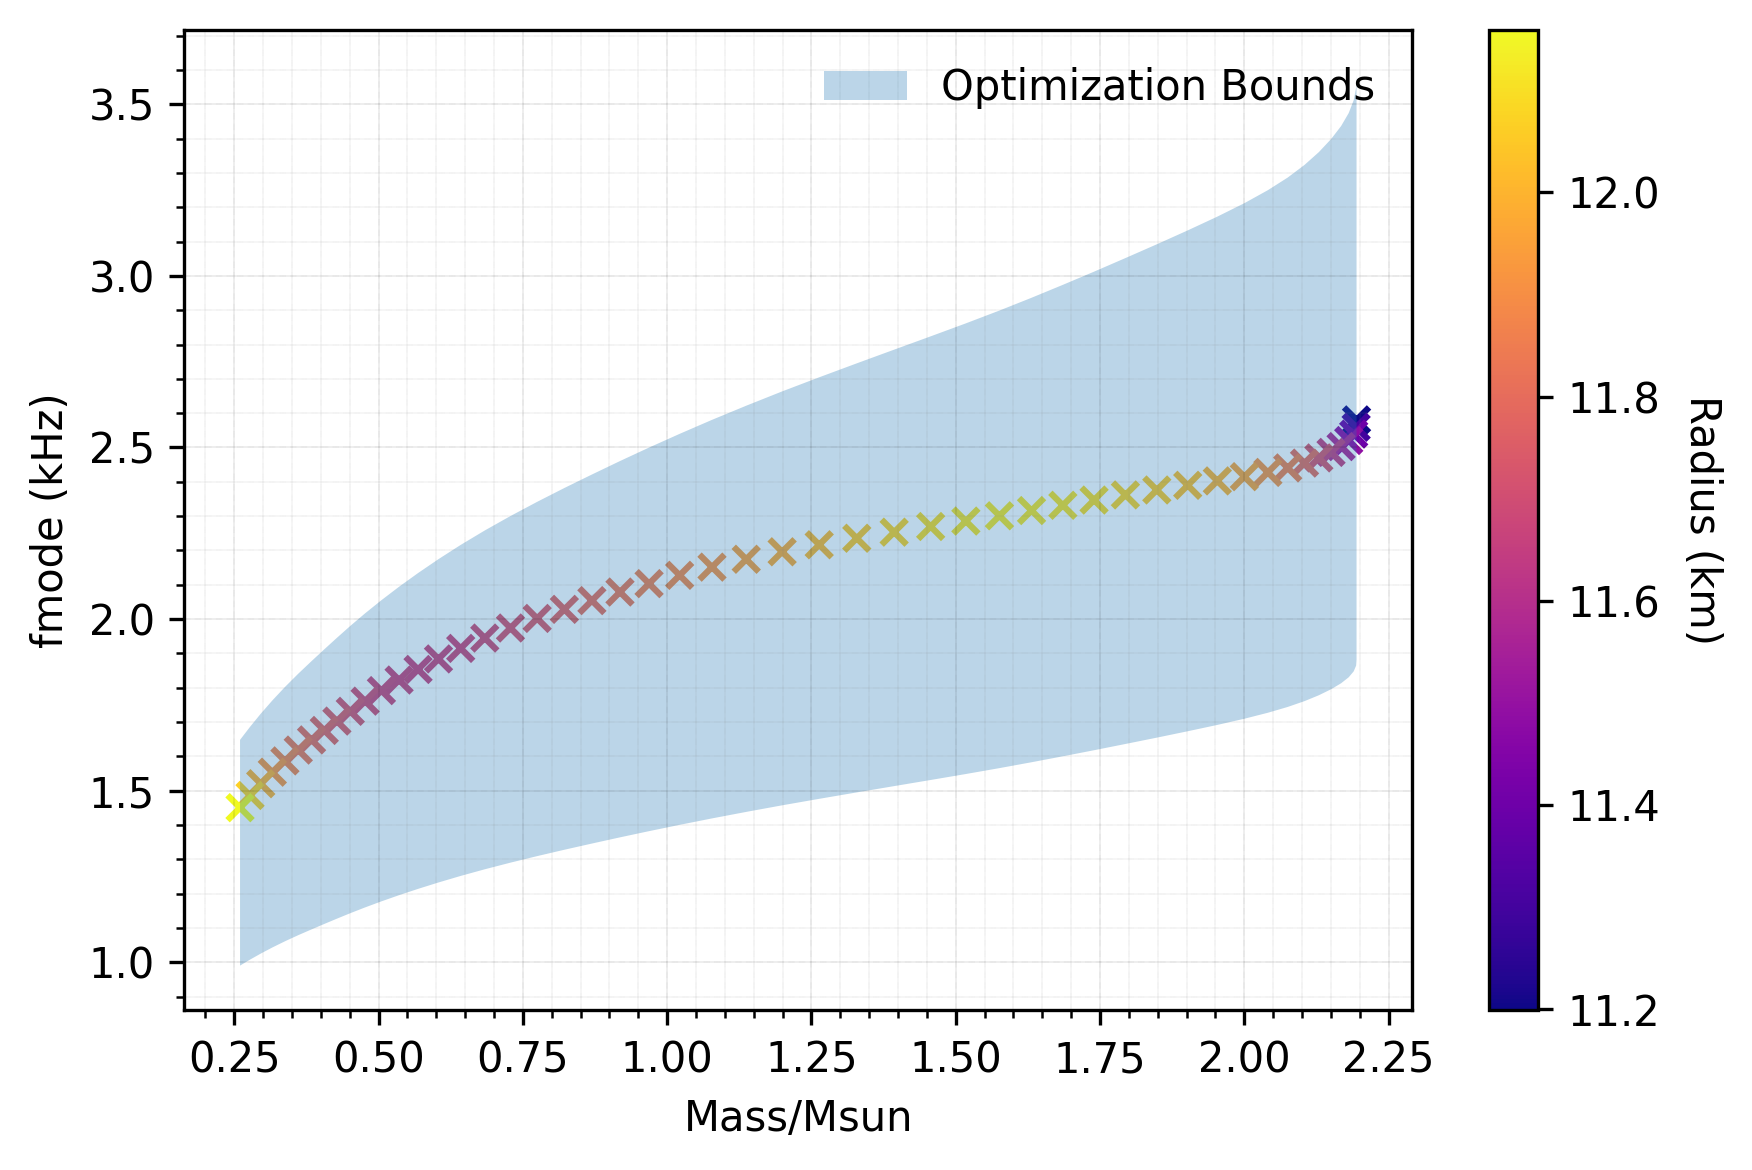

[STATUS] Completed eos_126...


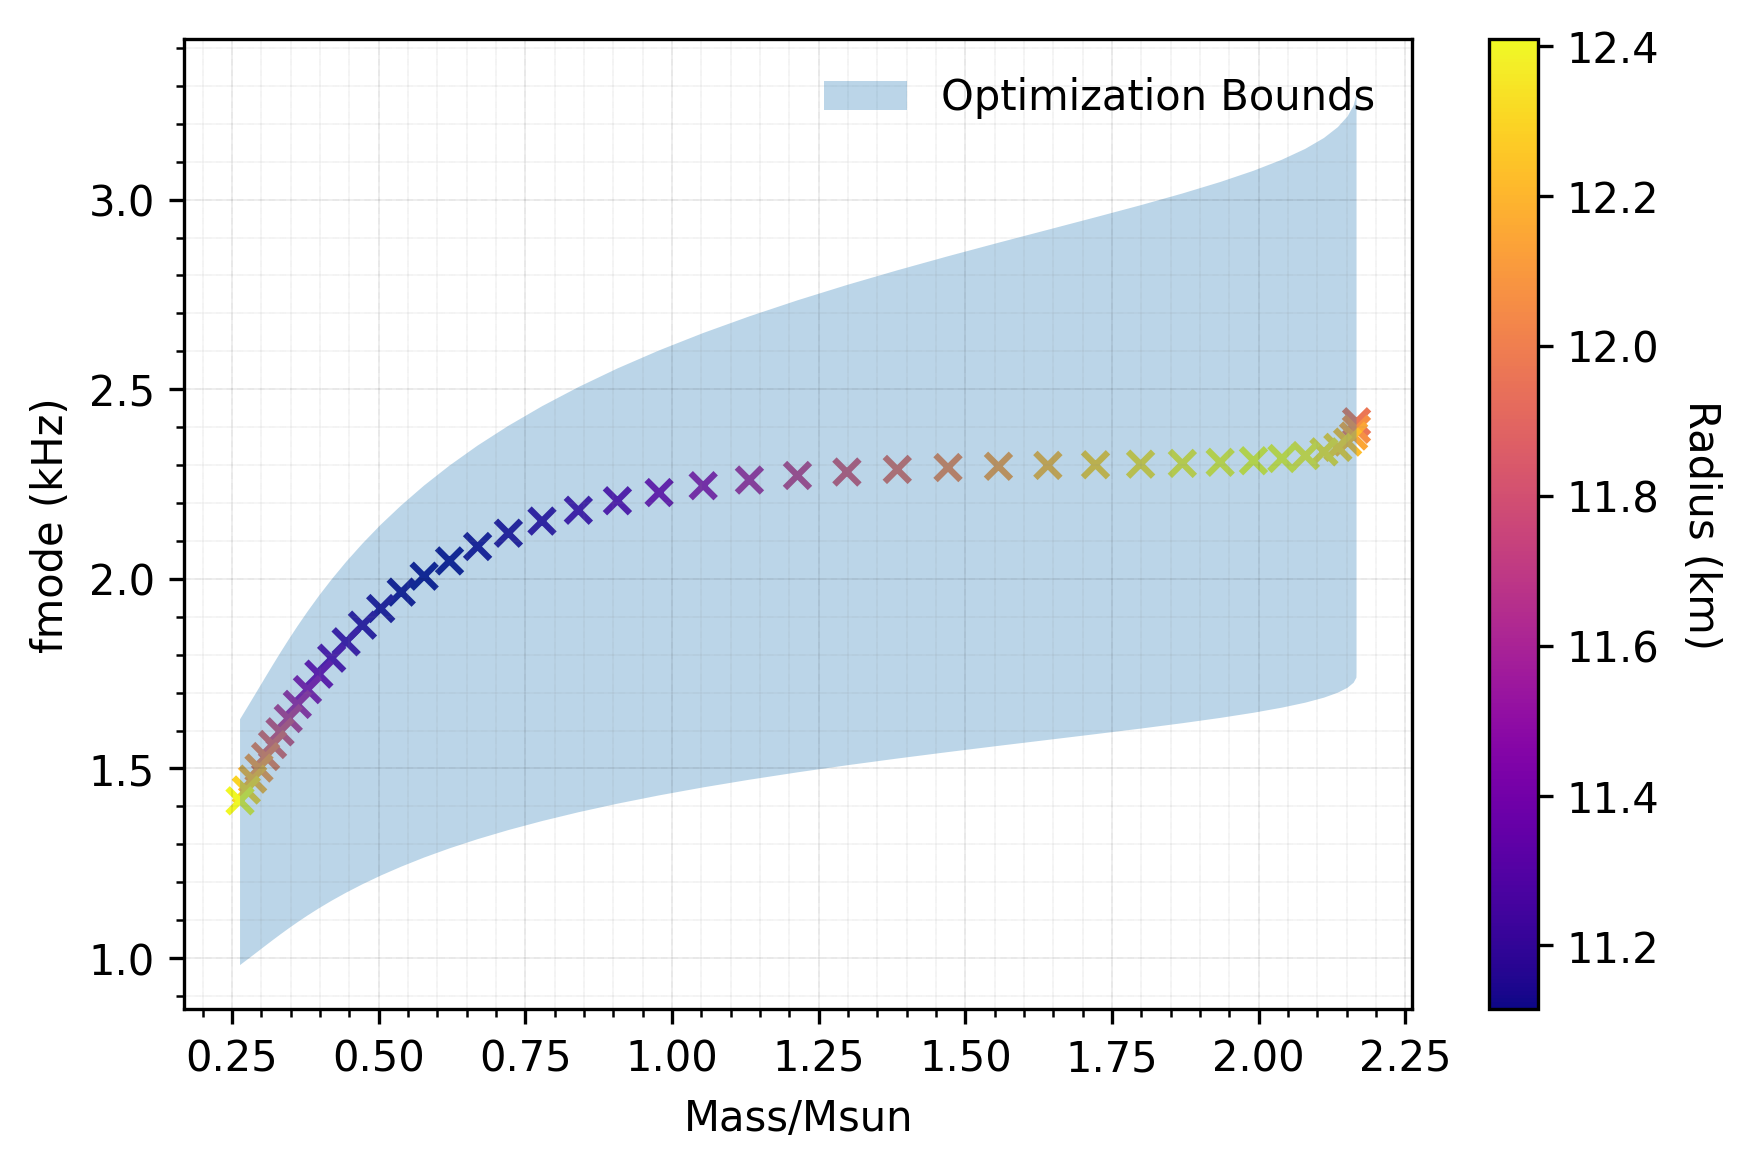

[STATUS] Completed eos_1260...


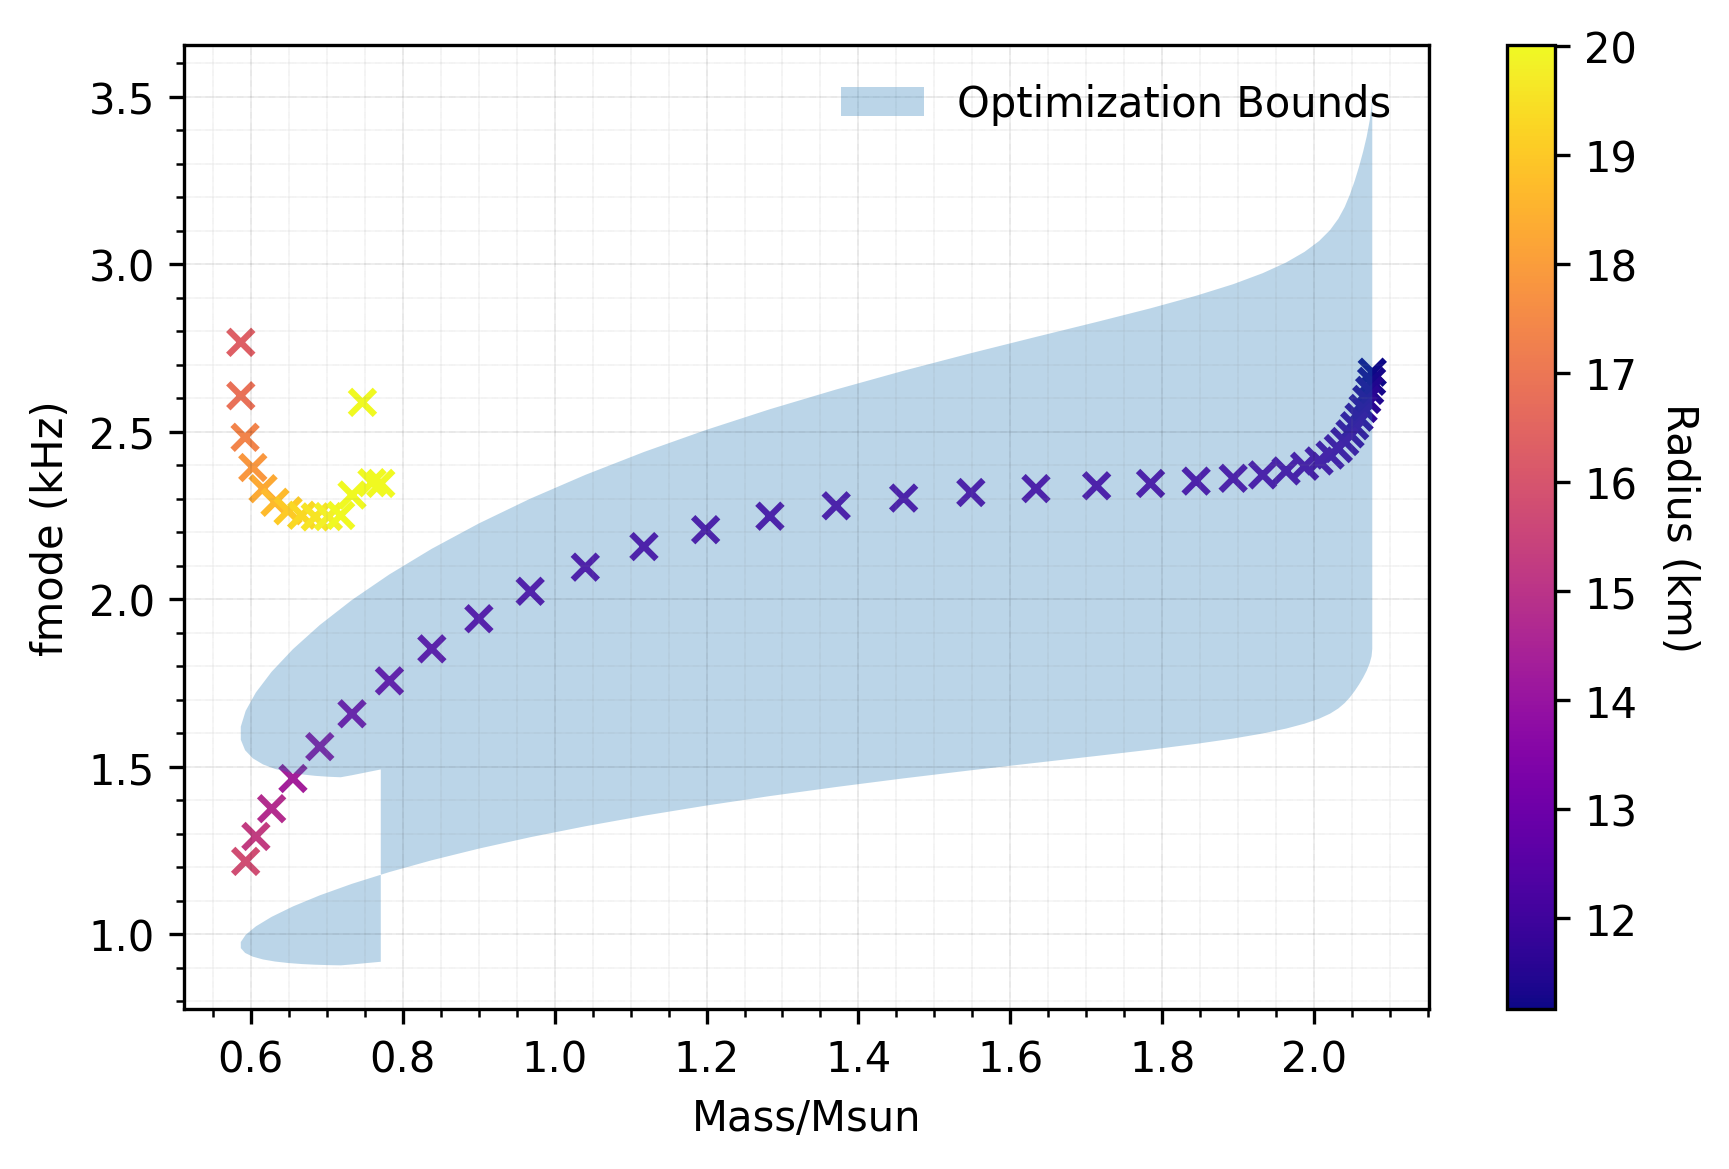

[STATUS] Completed eos_1261...


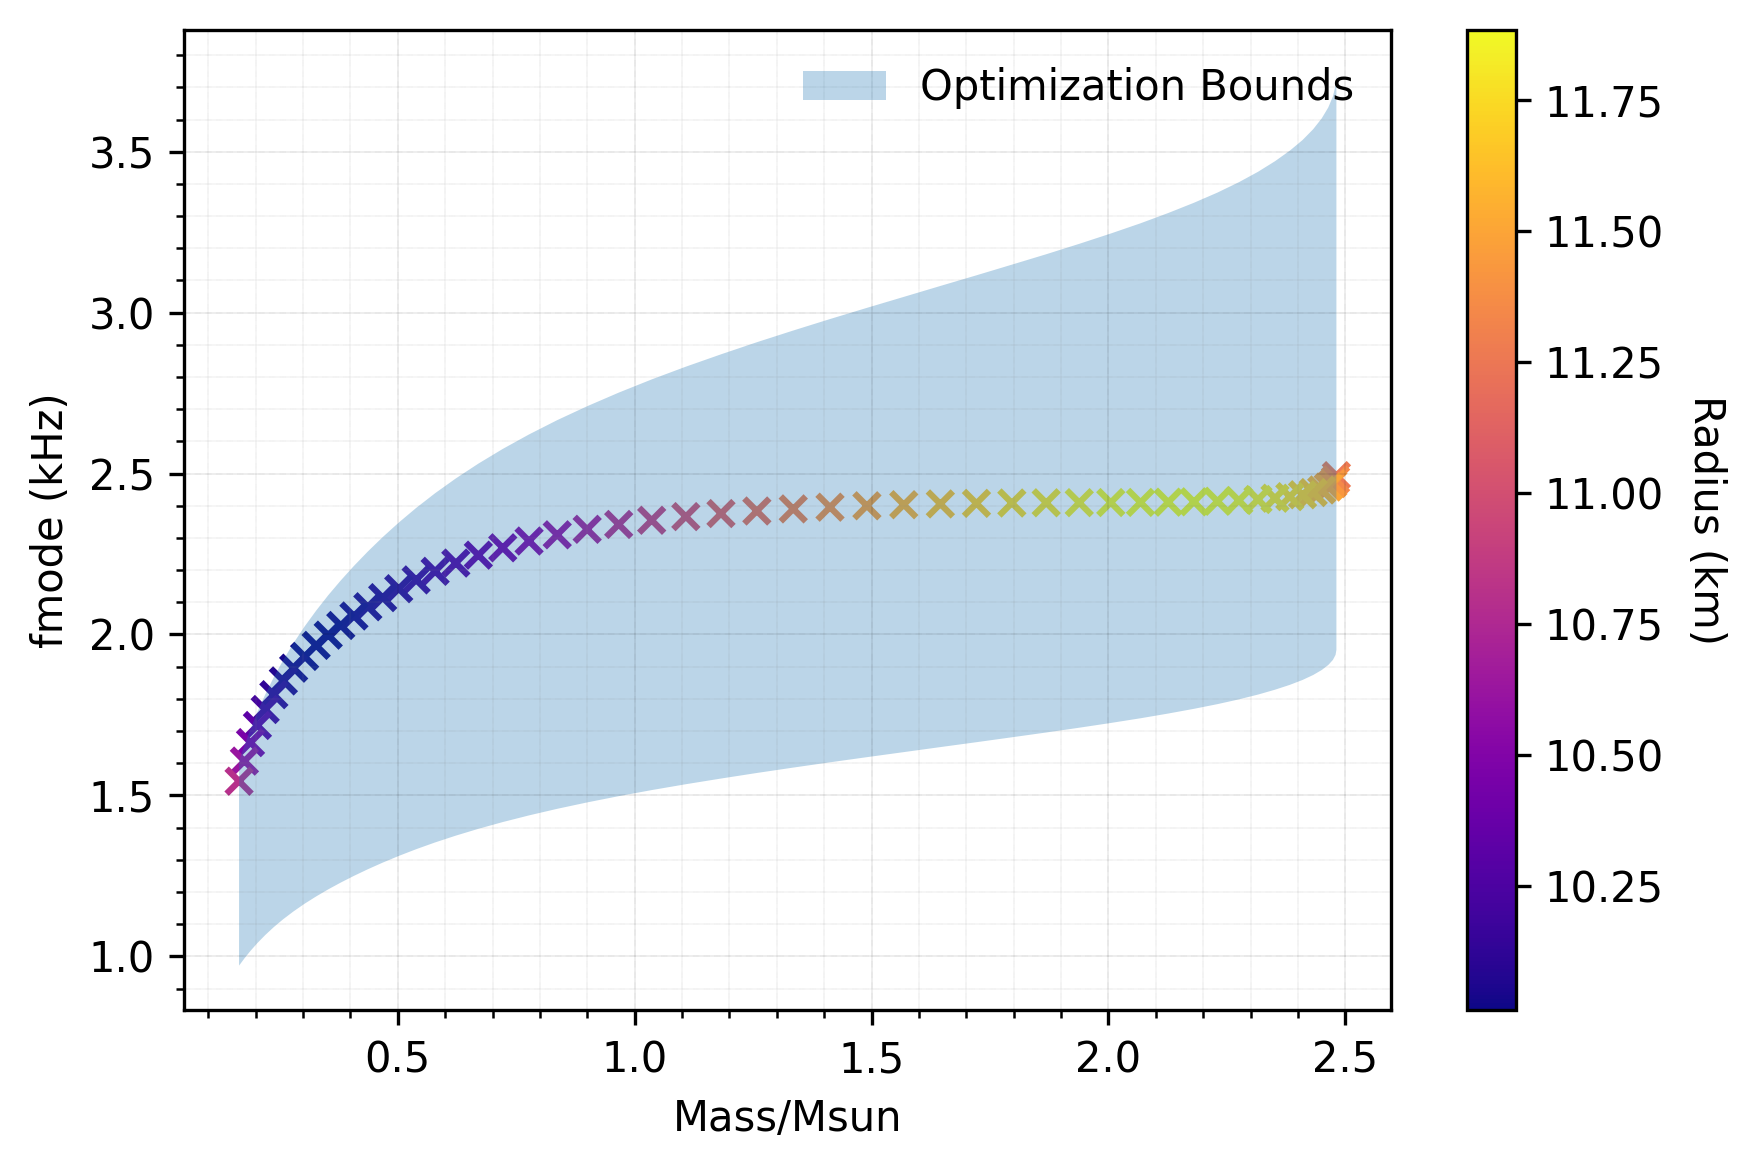

[STATUS] Completed eos_1262...


In [ ]:
%%time
vals = range(len(names))
pbar = tqdm(total=len(vals))
for i in vals:
    eos_name = names[i]
    if (eos_name + ".csv") in curr_list:
        print(f"[STATUS] {eos_name} already optimized... Skipping")
        pbar.update(1)
        time.sleep(0.05)
        continue
    fmodes1 = fmodes()
    fmodes1.set_EOS("/Users/utkarsh/PycharmProjects/fmodes/LCEHL_EOS_posterior_samples/" + eos_name + ".csv")
    try:
        fmodes1.parallel_simulation()
    except:
        print(f"[ERROR] Integration Failure: {eos_name}... Skipping")
        pbar.update(1)
        time.sleep(0.01)
        continue
#     fmodes1.print_results()
    fmodes1.plot_fmass()

    res = np.array([fmodes1.mass_arr, fmodes1.radius_arr, fmodes1.f_mode_arr])
    np.savetxt("posterior_fmodes/"+eos_name+".csv", res.T, 
                   header = "mass,radius,fmode", 
                   comments = "", 
                  delimiter = ",")
    pbar.update(1)
    time.sleep(0.01)
    print(f"[STATUS] Completed {eos_name}...")
pbar.close()